# Healthcare Payment Trends in Pittsburgh, PA (2023)

## Questions

In [ ]:
# Questions 
# 1 What are the different recipient types for general payments and how do they differ from the recipient types for research payments?
# 2 research payments for the major recipient types what entities are getting the most funding? 
# 3 the fluctuation in funding by months over the year 2023?
# 4 For research payments, investigate whether the funded research study is registered on ClinicalTrials.gov and examine the dispute status of the study?
# 5 What is the distribution of payments made in cash vs. kind or services based on counts and values?

# 6 How are the payments distributed across the city of pittsburgh in terms of physical location?


# 7 How do the financial distributions differ between General and Research Payments in Pittsburgh for 2023?
# 8 What are the seasonal patterns observed in General and Research Payments throughout 2023?
# 9 How are payments distributed across different types of healthcare recipients in General and Research Payments?
# 10 What are the variations in financial investments across different medical specialties?

# 11 What are top companies by payment amount for general payments?
# 12 What are the top paid products by area and brand name?
# 13 What are the top product areas by total payment amount?
# 14 What are the top products (brand names) by total payment amount?

## Conclusions

In [ ]:
# 1. Different Recipient Types for General and Research Payments:
# General Payments: These prioritize interactions with physicians and focus on relationship-building activities, such as payments for food, beverages, and travel.
# Research Payments: These are mainly directed toward teaching hospitals and non-covered entities to support research initiatives, including clinical trials and innovation​.

# 2. Entities Receiving the Most Funding for Research Payments:
# Among non-covered entities, the NSABP Foundation received the highest payments.
# Among teaching hospitals, various branches of UPMC were the primary recipients, followed by the Western Pennsylvania Hospital​.

# 3. Fluctuation in Funding by Month in 2023:
# General payments exhibited multiple seasonal peaks, notably in March and October, while the lowest activity occurred in July.
# Research payments were concentrated and characterized by fewer but high-value transactions, reflecting strategic investments in specific periods​.

# 4. Research Payments, ClinicalTrials.gov Registration, and Dispute Status:
# The majority of the funded research studies were registered on ClinicalTrials.gov, ensuring regulatory oversight and transparency.
# None of the studies had a running dispute against them.

# 6. General Payments are distributed across most areas of Pittsburgh with UPMC (Shadyside) and AGH (Allegheny General Hospital) emerging as hotspots.
# Research Payments are also distributed across most areas of Pittsburgh with UPMC (Shadyside) and UPMC(Mercy) emerging as hotspots.

# 7. In Pittsburgh for 2023, General Payments totaled $18.3 million, engaging a wide network of physicians with smaller, frequent transactions, 
# while Research Payments accounted for 79.5% of total payments, focusing on fewer recipients with substantial investments in long-term medical research and innovation.

# 8. Seasonal patterns show that General Payments had multiple peaks in March and October and lower activity in July and December, 
# while Research Payments were more concentrated, with a significant spike in March and relatively steady high values in December.

# 9. General Payments were primarily directed to physicians (71.2%) and non-physician practitioners (28.8%), 
# whereas Research Payments were largely allocated to non-covered entities (66.5%) and teaching hospitals (29.2%), reflecting distinct focuses on professional services versus institutional research support.

# 10. Financial investments varied significantly across medical specialties, with Diagnostic NeuroImaging receiving the highest average General Payments (~$300) and Orthopedic Surgery (Spine) the lowest (~$170), 
# while Surgical Oncology stood out in Research Payments with over $4 million in average funding, emphasizing its strategic importance.

# 11. The top companies by payment amount for General Payments in Pittsburgh for 2023 include Arthrex, Inc., Vitalant, DePuy Synthes, and ABBVIE, 
# reflecting significant contributions from medical device and pharmaceutical sectors.

# 12. The top paid products by area and brand name include Arthrex (orthopedic surgical implants), ATTUNE (knee replacement systems), 
# and DAVINCI XI (robotic surgical systems), showcasing investments in advanced therapeutic technologies.

# 13. The top product areas by total payment amount are medical devices, particularly for orthopedic and 
# surgery-related products such as shoulder implants (rotator cuff) and biceps-related devices.

# 14. The top products by total payment amount are Arthrex, ATTUNE, and DAVINCI XI, emphasizing their 
# prominence in healthcare payments in Pittsburgh for 2023.

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('pitt_data.csv')
df.head(2)

# missing_values = df.isnull().sum()
# missing_values.to_csv('missing_values.csv', header=True)

C:\Users\moidu\AppData\Local\Temp\ipykernel_34436\1853461148.py:1: DtypeWarning: Columns (4,20,33,34,35,70,76,81,82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pitt_data.csv')


Change_Type                        Covered_Recipient_Type  \
0         NEW  Covered Recipient Non-Physician Practitioner   
1         NEW  Covered Recipient Non-Physician Practitioner   

   Teaching_Hospital_CCN  Teaching_Hospital_ID Teaching_Hospital_Name  \
0                    NaN                   NaN                    NaN   
1                    NaN                   NaN                    NaN   

   Covered_Recipient_Profile_ID  Covered_Recipient_NPI  \
0                    11121677.0           1.952642e+09   
1                    11121677.0           1.952642e+09   

  Covered_Recipient_First_Name Covered_Recipient_Middle_Name  \
0                    CHRISTINA                           NaN   
1                    CHRISTINA                           NaN   

  Covered_Recipient_Last_Name Covered_Recipient_Name_Suffix  \
0                      RIDDLE                           NaN   
1                      RIDDLE                           NaN   

  Recipient_Primary_Business_Street_Address_Line1  \
0                          1350 LOCUST ST STE 100   
1                          1350 LOCUST ST STE 100   

  Recipient_Primary_Business_Street_Address_Line2 Recipient_City  \
0                                       SUITE 100     PITTSBURGH   
1                                       SUITE 100     PITTSBURGH   

  Recipient_State Recipient_Zip_Code Recipient_Country  Recipient_Province  \
0              PA         15219-4738     United States                 NaN   
1              PA         15219-4738     United States                 NaN   

   Recipient_Postal_Code Covered_Recipient_Primary_Type_1  \
0                    NaN              Physician Assistant   
1                    NaN              Physician Assistant   

  Covered_Recipient_Primary_Type_2  Covered_Recipient_Primary_Type_3  \
0                              NaN                               NaN   
1                              NaN                               NaN   

   Covered_Recipient_Primary_Type_4  Covered_Recipient_Primary_Type_5  \
0                               NaN                               NaN   
1                               NaN                               NaN   

   Covered_Recipient_Primary_Type_6  \
0                               NaN   
1                               NaN   

                       Covered_Recipient_Specialty_1  \
0  Physician Assistants & Advanced Practice Nursi...   
1  Physician Assistants & Advanced Practice Nursi...   

   Covered_Recipient_Specialty_2  Covered_Recipient_Specialty_3  \
0                            NaN                            NaN   
1                            NaN                            NaN   

   Covered_Recipient_Specialty_4  Covered_Recipient_Specialty_5  \
0                            NaN                            NaN   
1                            NaN                            NaN   

   Covered_Recipient_Specialty_6 Covered_Recipient_License_State_code1  \
0                            NaN                                    PA   
1                            NaN                                    PA   

  Covered_Recipient_License_State_code2 Covered_Recipient_License_State_code3  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   

  Covered_Recipient_License_State_code4 Covered_Recipient_License_State_code5  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   

  Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
0           Kestra Medical Technology Services, Inc.          
1           Kestra Medical Technology Services, Inc.          

   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID  \
0                                       100001176895             
1                                       100001176895             

  Applicable_Manufactu

In [6]:
df.shape

(51427, 91)

In [7]:
df.drop(columns=['Teaching_Hospital_CCN','Teaching_Hospital_ID','Teaching_Hospital_Name','Covered_Recipient_Name_Suffix',
                 'Recipient_Province','Recipient_Postal_Code','Covered_Recipient_Primary_Type_2','Covered_Recipient_Primary_Type_3',
                 'Covered_Recipient_Primary_Type_4','Covered_Recipient_Primary_Type_5','Covered_Recipient_Primary_Type_6',
                 'Covered_Recipient_Specialty_2','Covered_Recipient_Specialty_3','Covered_Recipient_Specialty_4','Covered_Recipient_Specialty_5',
                 'Covered_Recipient_Specialty_6','Covered_Recipient_License_State_code2','Covered_Recipient_License_State_code3',
                 'Covered_Recipient_License_State_code4','Covered_Recipient_License_State_code5','Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
                 'Third_Party_Equals_Covered_Recipient_Indicator','Associated_Device_or_Medical_Supply_PDI_2','Associated_Drug_or_Biological_NDC_3',
                 'Associated_Device_or_Medical_Supply_PDI_3','Covered_or_Noncovered_Indicator_4','Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
                 'Product_Category_or_Therapeutic_Area_4','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4','Associated_Drug_or_Biological_NDC_4',
                 'Associated_Device_or_Medical_Supply_PDI_4','Covered_or_Noncovered_Indicator_5','Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
                 'Product_Category_or_Therapeutic_Area_5','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5','Associated_Drug_or_Biological_NDC_5',
                 'Associated_Device_or_Medical_Supply_PDI_5'], inplace=True)

In [10]:
df.Total_Amount_of_Payment_USDollars.describe()

count     51427.000000
mean        356.004718
std        4176.535927
min           0.010000
25%          15.400000
50%          22.240000
75%          82.520000
max      382868.950000
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [ ]:
# column_name = 'Total_Amount_of_Payment_USDollars'  
# percentile_99 = df['Total_Amount_of_Payment_USDollars'].quantile(0.999)
# filtered_df = df[df['Total_Amount_of_Payment_USDollars'] > percentile_99]
# filtered_df.sort_values(by=['Total_Amount_of_Payment_USDollars'],ascending=False).head(7)
# filtered_df.groupby(['Nature_of_Payment_or_Transfer_of_Value'])['Total_Amount_of_Payment_USDollars'].sum().reset_index().sort_values(by=['Total_Amount_of_Payment_USDollars'],ascending=False)
# df[df['Total_Amount_of_Payment_USDollars']
#         <percentile_99].groupby(['Nature_of_Payment_or_Transfer_of_Value']).agg({'Total_Amount_of_Payment_USDollars':'sum',
#                                                                                  'Total_Amount_of_Payment_USDollars':'count'})#['Total_Amount_of_Payment_USDollars'].sum().reset_index().sort_values(by=['Total_Amount_of_Payment_USDollars'],ascending=False)

In [14]:
 df\
    .groupby(['Nature_of_Payment_or_Transfer_of_Value'])\
    .agg(total_amount=('Total_Amount_of_Payment_USDollars', 'sum'),
         payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
    .reset_index()\
    .sort_values(by=['total_amount'], ascending=False)

Nature_of_Payment_or_Transfer_of_Value  total_amount  \
2   Compensation for services other than consultin...    6548560.39   
4                                      Consulting Fee    3529589.92   
13                                 Royalty or License    2820391.85   
8                                   Food and Beverage    1570720.22   
15                                 Travel and Lodging    1425535.72   
12            Long term medical supply or device loan     578287.02   
10                                              Grant     550953.40   
11                                          Honoraria     467873.21   
3   Compensation for serving as faculty or as a sp...     250448.96   
6                                           Education     219870.40   
0                                        Acquisitions     194046.76   
14  Space rental or facility fees (teaching hospit...      77912.00   
9                                                Gift      53511.05   
5                                    Debt forgiveness      15750.22   
1                             Charitable Contribution       3000.00   
7                                       Entertainment       1803.53   

    payment_count  
2            1828  
4            1258  
13             80  
8           42669  
15           4404  
12             71  
10             74  
11            228  
3              76  
6             623  
0               1  
14             34  
9              63  
5               8  
1               1  
7               9

In [17]:
#  df[df['Total_Amount_of_Payment_USDollars'] < percentile_99]\
#     .groupby(['Nature_of_Payment_or_Transfer_of_Value'])\
#     .agg(total_amount=('Total_Amount_of_Payment_USDollars', 'sum'),
#          payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
#     .reset_index()\
#     .sort_values(by=['total_amount'], ascending=False)

In [18]:
food_df = df[df['Nature_of_Payment_or_Transfer_of_Value']=='Food and Beverage'].reset_index(drop=True)
food_df.Total_Amount_of_Payment_USDollars.describe()

count    42669.000000
mean        36.811742
std         79.474476
min          0.180000
25%         14.580000
50%         19.980000
75%         31.250000
max      13369.140000
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [19]:
# percentile_99 = food_df['Total_Amount_of_Payment_USDollars'].quantile(0.99)
# filtered_df = food_df[food_df['Total_Amount_of_Payment_USDollars'] > percentile_99]
# filtered_df.sort_values(by=['Total_Amount_of_Payment_USDollars'],ascending=False)
# remaining_df = food_df[food_df['Total_Amount_of_Payment_USDollars']<percentile_99].reset_index(drop=True)

In [20]:
# import json
# import csv

# # Load JSON data from the text file
# with open('data_dict.json', 'r', encoding='utf-8') as file:
#     json_data = json.load(file)

# # Extract fields
# fields = json_data['data']['fields']

# # Define CSV file name
# csv_file_name = 'output.csv'

# # Write JSON data to CSV format
# with open(csv_file_name, 'w', newline='', encoding='utf-8') as csv_file:
#     csv_writer = csv.writer(csv_file)
    
#     # Write header
#     header = ['Title', 'Description', 'Type']
#     csv_writer.writerow(header)
    
#     # Write rows
#     for field in fields:
#         csv_writer.writerow([field['title'], field['description'], field['type']])

# print(f"Data has been written to {csv_file_name}")

In [21]:
df2 = df[df['Nature_of_Payment_or_Transfer_of_Value'].isin(['Food and Beverage','Travel and Lodging'])]
percentile_99 = df2['Total_Amount_of_Payment_USDollars'].quantile(0.999)
df3 = df2[df2['Total_Amount_of_Payment_USDollars'] < percentile_99].reset_index(drop=True)

In [22]:
df3.Total_Amount_of_Payment_USDollars.describe()

count    47025.000000
mean        58.434703
std        121.949483
min          0.010000
25%         14.960000
50%         21.000000
75%         44.940000
max       1921.090000
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [1]:
# # Code to create boxplot
# # Specify the column name
# column_name = 'Total_Amount_of_Payment_USDollars'  # Replace with the actual column name

# # Create the boxplot
# plt.figure(figsize=(8, 6))  # Adjust figure size if needed
# plt.boxplot(df3[column_name], vert=False, patch_artist=True) 
# plt.title(f'Boxplot of {column_name}')
# plt.xlabel(column_name)
# plt.show()

In [27]:
df2[df2['Nature_of_Payment_or_Transfer_of_Value']=='Travel and Lodging'].Total_Amount_of_Payment_USDollars.describe()

count     4404.000000
mean       323.691126
std        687.674667
min          0.010000
25%         47.075000
50%        186.785000
75%        403.790000
max      22318.430000
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [2]:
# df2[df2['Total_Amount_of_Payment_USDollars']<0.1]

In [34]:
df2.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'])['Total_Amount_of_Payment_USDollars'].sum().reset_index().sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)

Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
521                                Stryker Corporation          
1                                          ABBVIE INC.          
354                                    Medtronic, Inc.          
21                                 Abbott Laboratories          
290                       Janssen Pharmaceuticals, Inc          
..                                                 ...          
534                                TRICE MEDICAL, INC.          
372                       Monaghan Medical Corporation          
190                            Dynasplint Systems Inc.          
390                                  Neuronetics, Inc.          
207                         Endogastric Solutions, Inc          

     Total_Amount_of_Payment_USDollars  
521                          158705.50  
1                            152595.28  
354                          129317.80  
21                           100675.68  
290                           94677.02  
..                                 ...  
534                              10.77  
372                              10.50  
190                               7.63  
390                               6.84  
207                               6.22  

[595 rows x 2 columns]

In [ ]:
country_df = df.groupby('Country_of_Travel')['Total_Amount_of_Payment_USDollars'].count().reset_index()
country_df = country_df[country_df['Country_of_Travel']!='United States']
country_df

In [ ]:
# Add latitude and longitude for each country using geopy
geolocator = Nominatim(user_agent="geoapi")
coordinates = []

for country in country_df['Country_of_Travel']:
    location = geolocator.geocode(country)
    if location:
        coordinates.append((location.latitude, location.longitude))
    else:
        coordinates.append((None, None))

country_df['Coordinates'] = coordinates

# Filter out rows with missing coordinates
country_df = country_df.dropna(subset=['Coordinates'])

# Create a base map centered on the world
m = folium.Map(location=[20, 0], zoom_start=2)

# Prepare heatmap data
heat_data = [
    (*coord, payment) for coord, payment in zip(country_df['Coordinates'], country_df['Total_Amount_of_Payment_USDollars'])
]

# Add HeatMap with custom gradient
custom_gradient = {
    0.2: 'yellow',         # Low intensity (blue)
    0.5: 'orange',         # Medium intensity (green)
    0.8: 'rgba(255, 0, 0, 0.5)',  # High intensity (semi-transparent red)
    1: 'rgba(255, 0, 0, 0.3)'     # Maximum intensity (more transparent red)
}
HeatMap(heat_data,radius=40, blur=60, max_zoom=3, min_opacity=0.3, max_opacity=0.7, gradient=custom_gradient).add_to(m)

# Save or display the map
m.save("world_heatmap.html")

In [ ]:
# Add latitude and longitude for each state using geopy
geolocator = Nominatim(user_agent="geoapi")
state_coordinates = []

for state in state_df['State_of_Travel']:
    location = geolocator.geocode(state + ", USA")
    if location:
        state_coordinates.append((location.latitude, location.longitude))
    else:
        state_coordinates.append((None, None))

state_df['Coordinates'] = state_coordinates

# Filter out rows with missing coordinates
state_df = state_df.dropna(subset=['Coordinates'])

# Create a base map
m = folium.Map(location=[37.8, -96], zoom_start=4)
custom_gradient = {
    0.2: 'yellow',         # Low intensity (blue)
    0.5: 'orange',         # Medium intensity (green)
    0.8: 'rgba(255, 0, 0, 0.5)',  # High intensity (semi-transparent red)
    1: 'rgba(255, 0, 0, 0.3)'     # Maximum intensity (more transparent red)
}
# Add heatmap layer
heat_data = [
    (*coord, payment) for coord, payment in zip(state_df['Coordinates'], state_df['Total_Amount_of_Payment_USDollars'])
]
HeatMap(heat_data, radius=60, blur=60, max_zoom=3, min_opacity=0.3, max_opacity=0.7, gradient=custom_gradient).add_to(m)

# Save or display the map
m.save("us_heatmap.html")

In [ ]:
df['zip_code'] = df['Recipient_Zip_Code'].str[:5].astype('int')
# Load ZIP code data
zip_data = pd.read_csv('uszips.csv')  # Replace with your file path
zip_data.head(2)
# Merge datasets on the ZIP code column
merged_data = pd.merge(right=zip_data, left=df, left_on='zip_code', right_on='zip', how='left')
print(merged_data['zip'].isnull().sum(), merged_data.shape)
merged_data_2 = merged_data.dropna(subset=['zip'])

# Create a map centered on the USA
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add choropleth layer for ZIP codes
folium.Choropleth(
    geo_data='georef-united-states-of-america-zc-point@public.geojson',
    data=merged_data_2,
    columns=['zip_code', 'Total_Amount_of_Payment_USDollars'],
    key_on='feature.properties.zip_code',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales by ZIP Code'
).add_to(m)

m.save('map.html')  # Save to an HTML file

In [ ]:
# Calculate the 90th percentile
cap_value = merged_data_2['Total_Amount_of_Payment_USDollars'].quantile(0.90)
print(f"90th Percentile Cap: {cap_value}")
# Cap payment values at the 90th percentile
merged_data_2['Capped_Payment'] = merged_data_2['Total_Amount_of_Payment_USDollars'].clip(upper=cap_value)

In [ ]:
# Prepare data for heatmap: [latitude, longitude, weight]
heat_data = merged_data_2[['lat', 'lng', 'Capped_Payment']].values.tolist()

custom_gradient = {
    0.2: 'yellow',         # Low intensity (blue)
    0.5: 'orange',         # Medium intensity (green)
    0.8: 'rgba(255, 0, 0, 0.5)',  # High intensity (semi-transparent red)
    1: 'rgba(255, 0, 0, 0.3)'     # Maximum intensity (more transparent red)
}
# Create a Folium map centered on Pittsburgh
pittsburgh_map = folium.Map(location=[40.4406, -79.9959], zoom_start=12)

# Add heatmap layer
HeatMap(heat_data, radius=50, blur=60, max_zoom=3, min_opacity=0.3, max_opacity=0.7, gradient=custom_gradient).add_to(pittsburgh_map)

# Save or display the map
pittsburgh_map.save('pittsburgh_heatmap_amounts.html')

In [ ]:
merged_data_3 = merged_data_2.groupby(['lat','lng'])['Total_Amount_of_Payment_USDollars'].count().reset_index()

In [ ]:
from folium.plugins import HeatMap

# Prepare data for heatmap: [latitude, longitude, weight]
heat_data = merged_data_3[['lat', 'lng', 'Total_Amount_of_Payment_USDollars']].values.tolist()

custom_gradient = {
    0.2: 'yellow',         # Low intensity (blue)
    0.5: 'orange',         # Medium intensity (green)
    0.8: 'rgba(255, 0, 0, 0.5)',  # High intensity (semi-transparent red)
    1: 'rgba(255, 0, 0, 0.3)'     # Maximum intensity (more transparent red)
}
# Create a Folium map centered on Pittsburgh
pittsburgh_map = folium.Map(location=[40.4406, -79.9959], zoom_start=12)

# Add heatmap layer
HeatMap(heat_data, radius=50, blur=60, max_zoom=3, min_opacity=0.3, max_opacity=0.7, gradient=custom_gradient).add_to(pittsburgh_map)

# Save or display the map
pittsburgh_map.save('pittsburgh_heatmap_counts.html')

In [ ]:
df = pd.read_csv('pitt_data.csv')
#Just overall look though the data
df.head(2)
df.shape

C:\Users\77055\AppData\Local\Temp\ipykernel_23896\2762030415.py:1: DtypeWarning: Columns (4,20,33,34,35,70,76,81,82,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pitt_data.csv')


(51427, 91)

In [ ]:
#Dropping collumns with nulls data 
df.drop(columns=['Teaching_Hospital_CCN','Teaching_Hospital_ID','Teaching_Hospital_Name','Covered_Recipient_Name_Suffix',
                 'Recipient_Province','Recipient_Postal_Code','Covered_Recipient_Primary_Type_2','Covered_Recipient_Primary_Type_3',
                 'Covered_Recipient_Primary_Type_4','Covered_Recipient_Primary_Type_5','Covered_Recipient_Primary_Type_6',
                 'Covered_Recipient_Specialty_2','Covered_Recipient_Specialty_3','Covered_Recipient_Specialty_4','Covered_Recipient_Specialty_5',
                 'Covered_Recipient_Specialty_6','Covered_Recipient_License_State_code2','Covered_Recipient_License_State_code3',
                 'Covered_Recipient_License_State_code4','Covered_Recipient_License_State_code5','Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
                 'Third_Party_Equals_Covered_Recipient_Indicator','Associated_Device_or_Medical_Supply_PDI_2','Associated_Drug_or_Biological_NDC_3',
                 'Associated_Device_or_Medical_Supply_PDI_3','Covered_or_Noncovered_Indicator_4','Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
                 'Product_Category_or_Therapeutic_Area_4','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4','Associated_Drug_or_Biological_NDC_4',
                 'Associated_Device_or_Medical_Supply_PDI_4','Covered_or_Noncovered_Indicator_5','Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
                 'Product_Category_or_Therapeutic_Area_5','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5','Associated_Drug_or_Biological_NDC_5',
                 'Associated_Device_or_Medical_Supply_PDI_5'], inplace=True)

In [ ]:
#rechecking data 
df.shape
df.head(2)

Change_Type                        Covered_Recipient_Type  \
0         NEW  Covered Recipient Non-Physician Practitioner   
1         NEW  Covered Recipient Non-Physician Practitioner   

   Covered_Recipient_Profile_ID  Covered_Recipient_NPI  \
0                    11121677.0           1.952642e+09   
1                    11121677.0           1.952642e+09   

  Covered_Recipient_First_Name Covered_Recipient_Middle_Name  \
0                    CHRISTINA                           NaN   
1                    CHRISTINA                           NaN   

  Covered_Recipient_Last_Name Recipient_Primary_Business_Street_Address_Line1  \
0                      RIDDLE                          1350 LOCUST ST STE 100   
1                      RIDDLE                          1350 LOCUST ST STE 100   

  Recipient_Primary_Business_Street_Address_Line2 Recipient_City  \
0                                       SUITE 100     PITTSBURGH   
1                                       SUITE 100     PITTSBURGH   

  Recipient_State Recipient_Zip_Code Recipient_Country  \
0              PA         15219-4738     United States   
1              PA         15219-4738     United States   

  Covered_Recipient_Primary_Type_1  \
0              Physician Assistant   
1              Physician Assistant   

                       Covered_Recipient_Specialty_1  \
0  Physician Assistants & Advanced Practice Nursi...   
1  Physician Assistants & Advanced Practice Nursi...   

  Covered_Recipient_License_State_code1  \
0                                    PA   
1                                    PA   

  Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
0           Kestra Medical Technology Services, Inc.          
1           Kestra Medical Technology Services, Inc.          

   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID  \
0                                       100001176895             
1                                       100001176895             

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name  \
0           Kestra Medical Technology Services, Inc.              
1           Kestra Medical Technology Services, Inc.              

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  \
0                                                 WA               
1                                                 WA               

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country  \
0                                      United States                 
1                                      United States                 

   Total_Amount_of_Payment_USDollars Date_of_Payment  \
0                              18.46      12/20/2023   
1                              34.24      04/27/2023   

   Number_of_Payments_Included_in_Total_Amount  \
0                                            1   
1                                            1   

  Form_of_Payment_or_Transfer_of_Value Nature_of_Payment_or_Transfer_of_Value  \
0              Cash or cash equivalent                      Food and Beverage   
1              Cash or cash equivalent                      Food and Beverage   

  City_of_Travel State_of_Travel Country_of_Travel  \
0            NaN             NaN               NaN   
1            NaN             NaN               NaN   

  Physician_Ownership_Indicator Third_Party_Payment_Recipient_Indicator  \
0                            No                  No Third Party Payment   
1                            No                  No Third Party Payment   

  Charity_Indicator Contextual_Information Delay_in_Publication_Indicator  \
0               NaN                    NaN                             No   
1               NaN                    NaN                             No   

   Record_ID Dispute_Status_for_Publication Related_Product_Indicator  \
0  976385029                             No                       Yes   
1  976385033                             No                       Ye

In [ ]:
#First step is to explore number of unique values in each column and name of each column. This is necessary to select columns for further analysis
unique_values = df.nunique()
print(unique_values)

Change_Type                                                             1
Covered_Recipient_Type                                                  3
Covered_Recipient_Profile_ID                                         5310
Covered_Recipient_NPI                                                5286
Covered_Recipient_First_Name                                         2314
Covered_Recipient_Middle_Name                                         733
Covered_Recipient_Last_Name                                          4655
Recipient_Primary_Business_Street_Address_Line1                      2471
Recipient_Primary_Business_Street_Address_Line2                      1197
Recipient_City                                                          4
Recipient_State                                                         1
Recipient_Zip_Code                                                    680
Recipient_Country                                                       1
Covered_Recipient_Primary_Type_1      

In [ ]:
#grouping of columns of same data type for data analysis later. We see that few data have a numerical data type and many categorical data, 
#leading to selection of analysis. 

grouped_columns = df.dtypes.groupby(df.dtypes).apply(lambda x: list(x.index))

for dtype, columns in grouped_columns.items():
    print(f"Data Type: {dtype}")
    print(f"Columns: {columns}\n")

Data Type: int64
Columns: ['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID', 'Number_of_Payments_Included_in_Total_Amount', 'Record_ID', 'Program_Year']

Data Type: float64
Columns: ['Covered_Recipient_Profile_ID', 'Covered_Recipient_NPI', 'Total_Amount_of_Payment_USDollars']

Data Type: object
Columns: ['Change_Type', 'Covered_Recipient_Type', 'Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name', 'Covered_Recipient_Last_Name', 'Recipient_Primary_Business_Street_Address_Line1', 'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City', 'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country', 'Covered_Recipient_Primary_Type_1', 'Covered_Recipient_Specialty_1', 'Covered_Recipient_License_State_code1', 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Co

In [ ]:
#After previous step I read metadata and explored distinct values for each column, 
#which allowed me to select the most important collumns for further work. 

columns_to_keep = [
    "Covered_Recipient_Type",
    "Covered_Recipient_Profile_ID",
    "Covered_Recipient_NPI",
    "Covered_Recipient_First_Name",
    "Covered_Recipient_Last_Name",
    "Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Number_of_Payments_Included_in_Total_Amount",
    "Nature_of_Payment_or_Transfer_of_Value",
    "City_of_Travel",
    "State_of_Travel",
    "Country_of_Travel",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Product_Category_or_Therapeutic_Area_1",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2",
    "Product_Category_or_Therapeutic_Area_2",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3",
    "Product_Category_or_Therapeutic_Area_3",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3"
]

# Filter the DataFrame
filtered_df = df[columns_to_keep]

# Display the first few rows
filtered_df.head()
filtered_df.shape

(51427, 24)

In [ ]:
#Overall numbers for General Payments Data to get big picture level of the data

unique_physicians = filtered_df['Covered_Recipient_NPI'].nunique()
print(f"Number of unique physicians who received payment: {unique_physicians}\n")

total_payment = filtered_df['Total_Amount_of_Payment_USDollars'].sum()
print(f"Total amount of General Payments in 2023 for Pittsburgh, PA physicians: ${total_payment:,.2f}\n")

unique_companies_2023 = filtered_df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'].nunique()
print(f"Number of unique companies making payments in 2023: {unique_companies_2023}")

Number of unique physicians who received payment: 5286

Total amount of General Payments in 2023 for Pittsburgh, PA physicians: $18,308,254.65

Number of unique companies making payments in 2023: 665


In [ ]:
#Overall numbers for Research Payments Data to get big picture level of the data

res_df = pd.read_csv('research_data.csv')
res_df.head()

r_unique_physicians = res_df['Covered_Recipient_NPI'].nunique()
print(f"Number of unique physicians who received payment: {r_unique_physicians}\n")

r_total_payment = res_df['Total_Amount_of_Payment_USDollars'].sum()
print(f"Total amount of research Payments in 2023 for Pittsburgh, PA physicians: ${r_total_payment:,.2f}\n")

r_unique_companies_2023 = res_df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'].nunique()
print(f"Number of unique companies making Research related payments in 2023: {r_unique_companies_2023}")


Number of unique physicians who received payment: 59

Total amount of research Payments in 2023 for Pittsburgh, PA physicians: $70,885,210.52

Number of unique companies making Research related payments in 2023: 185


C:\Users\77055\AppData\Local\Temp\ipykernel_23896\568693515.py:1: DtypeWarning: Columns (5,8,9,10,11,20,26,32,43,73,97,101,104,106,108,110,111,112,113,116,122,128,129,227,228,229,230,231) have mixed types. Specify dtype option on import or set low_memory=False.
  res_df = pd.read_csv('research_data.csv')


In [ ]:
filtered_df.Total_Amount_of_Payment_USDollars.describe()

count     51427.000000
mean        356.004718
std        4176.535927
min           0.010000
25%          15.400000
50%          22.240000
75%          82.520000
max      382868.950000
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [ ]:
#Since the number of distinct companies was too much, I decided to show only top companies by payment. This code allows to see the distribution of numbers.
#Since numbers in millions it is better to convert them to thousands 
company_payment = filtered_df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')['Total_Amount_of_Payment_USDollars'].sum().sort_values(ascending=False)
company_payment.head(10)

Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name
Vitalant                          2276102.03
Arthrex, Inc.                     1678041.19
DePuy Synthes Sales Inc.           741550.46
ABBVIE INC.                        649215.77
Intuitive Surgical, Inc.           625989.04
Stryker Corporation                511939.00
GE HEALTHCARE                      462904.73
Medtronic, Inc.                    454835.53
Pfizer Inc.                        412128.89
AstraZeneca Pharmaceuticals LP     360601.24
Name: Total_Amount_of_Payment_USDollars, dtype: float64

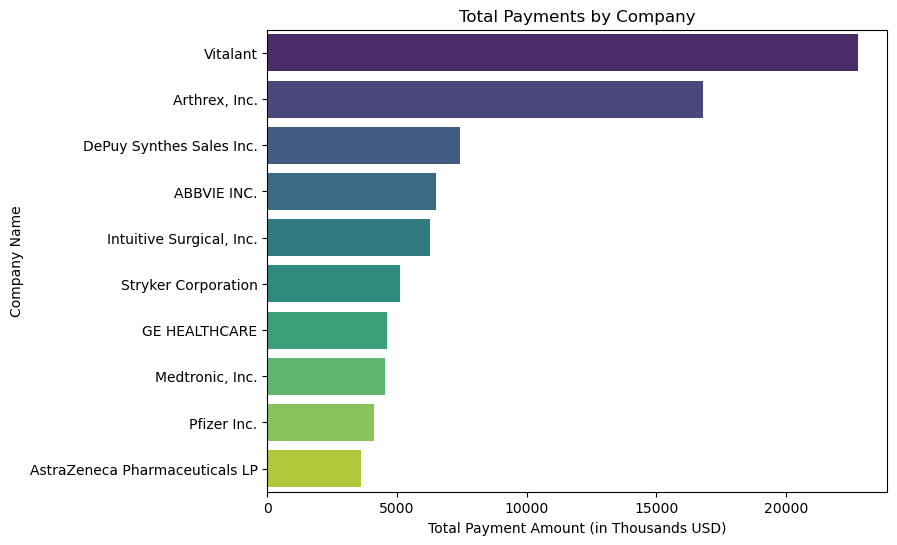

In [ ]:
#Questions: What are top companies by payment amount
#Question: What are the top payed products by area and brand name
#Question: Top product areas by total payment amount
#Question: Top products (brand names) by total payment amount
payment_by_company = filtered_df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')\
                    .agg(total=('Total_Amount_of_Payment_USDollars', 'sum'),
                         count=('Total_Amount_of_Payment_USDollars', 'count'))\
                    .reset_index()\
                    .sort_values(by='total', ascending=False)\
                     .reset_index(drop=True)

top_companies = payment_by_company.head(10)

# Bar plot for payment by product type
plt.figure(figsize=(8, 6))
sns.barplot(data=top_companies, 
            x=top_companies['total'] / 100, 
            y='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 
            palette='viridis')
plt.title('Total Payments by Company')
plt.xlabel('Total Payment Amount (in Thousands USD)')
plt.ylabel('Company Name')
plt.show()

In [ ]:
#Question: What are the top payed products by area and brand name
#Question: Top product areas by total payment amount
#Question: Top products (brand names) by total payment amount
#However the data about the product for which opayment was made are scattered across three block of columns.
# One block concists of columns:"Covered_or_Noncovered_Indicator_1, Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1, Product_Category_or_Therapeutic_Area_1, Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1, Associated_Drug_or_Biological_NDC_1, Associated_Device_or_Medical_Supply_PDI_1"
#other two blocks are the same but just with different number at the end 
#Thus we need first to reorganise the data to make accurate and consistent analysis.


final_columns_to_keep1 = [
    "Covered_Recipient_Type",
    "Covered_Recipient_Profile_ID",
    "Covered_Recipient_NPI",
    "Covered_Recipient_First_Name",
    "Covered_Recipient_Last_Name",
    "Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Number_of_Payments_Included_in_Total_Amount",
    "Nature_of_Payment_or_Transfer_of_Value",
    "City_of_Travel",
    "State_of_Travel",
    "Country_of_Travel",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1",
    "Product_Category_or_Therapeutic_Area_1",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1"
]

final_columns_to_keep2 = [
    "Covered_Recipient_Type",
    "Covered_Recipient_Profile_ID",
    "Covered_Recipient_NPI",
    "Covered_Recipient_First_Name",
    "Covered_Recipient_Last_Name",
    "Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Number_of_Payments_Included_in_Total_Amount",
    "Nature_of_Payment_or_Transfer_of_Value",
    "City_of_Travel",
    "State_of_Travel",
    "Country_of_Travel",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2",
    "Product_Category_or_Therapeutic_Area_2",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2"
]

final_columns_to_keep3 = [
    "Covered_Recipient_Type",
    "Covered_Recipient_Profile_ID",
    "Covered_Recipient_NPI",
    "Covered_Recipient_First_Name",
    "Covered_Recipient_Last_Name",
    "Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID",
    "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State",
    "Total_Amount_of_Payment_USDollars",
    "Date_of_Payment",
    "Number_of_Payments_Included_in_Total_Amount",
    "Nature_of_Payment_or_Transfer_of_Value",
    "City_of_Travel",
    "State_of_Travel",
    "Country_of_Travel",
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3",
    "Product_Category_or_Therapeutic_Area_3",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3"
]
df1 = filtered_df[final_columns_to_keep1]
df2 = filtered_df[final_columns_to_keep2]
df3 = filtered_df[final_columns_to_keep3]

# Display the first few rows of the final DataFrame
df1.head(10)
df1.shape
df2.shape


(51427, 18)

In [ ]:
#for further concatenation and consistency I renamed the columns
new_column_names = {
    "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1": "ProductType",
    "Product_Category_or_Therapeutic_Area_1": "ProductCategory",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1": "ProductName",
     "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2": "ProductType",
    "Product_Category_or_Therapeutic_Area_2": "ProductCategory",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2": "ProductName",
     "Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3": "ProductType",
    "Product_Category_or_Therapeutic_Area_3": "ProductCategory",
    "Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3": "ProductName"
}

# Rename columns
df1 = df1.rename(columns=new_column_names)
df2 = df2.rename(columns=new_column_names)
df3 = df3.rename(columns=new_column_names)

# Display the updated DataFrame
df3.head()

Covered_Recipient_Type  Covered_Recipient_Profile_ID  \
0  Covered Recipient Non-Physician Practitioner                    11121677.0   
1  Covered Recipient Non-Physician Practitioner                    11121677.0   
2  Covered Recipient Non-Physician Practitioner                    11116662.0   
3  Covered Recipient Non-Physician Practitioner                    10830862.0   
4  Covered Recipient Non-Physician Practitioner                    10553078.0   

   Covered_Recipient_NPI Covered_Recipient_First_Name  \
0           1.952642e+09                    CHRISTINA   
1           1.952642e+09                    CHRISTINA   
2           1.588054e+09                      SHARYNA   
3           1.801967e+09                       JANICE   
4           1.669536e+09                         ERIC   

  Covered_Recipient_Last_Name  \
0                      RIDDLE   
1                      RIDDLE   
2                      ROSATI   
3                       MAGEE   
4                     TOLCHIN   

  Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
0           Kestra Medical Technology Services, Inc.          
1           Kestra Medical Technology Services, Inc.          
2           Kestra Medical Technology Services, Inc.          
3           Kestra Medical Technology Services, Inc.          
4                        Avita Medical Americas, Llc          

   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID  \
0                                       100001176895             
1                                       100001176895             
2                                       100001176895             
3                                       100001176895             
4                                       100000281816             

  Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  \
0                                                 WA               
1                                                 WA               
2                                                 WA               
3                                                 WA               
4                                                 CA               

   Total_Amount_of_Payment_USDollars Date_of_Payment  \
0                              18.46      12/20/2023   
1                              34.24      04/27/2023   
2                              24.82      02/23/2023   
3                              18.46      12/20/2023   
4                               5.33      02/17/2023   

   Number_of_Payments_Included_in_Total_Amount  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

  Nature_of_Payment_or_Transfer_of_Value City_of_Travel State_of_Travel  \
0                      Food and Beverage            NaN             NaN   
1                      Food and Beverage            NaN             NaN   
2                      Food and Beverage            NaN             NaN   
3                      Food and Beverage            NaN             NaN   
4                      Food and Beverage            NaN             NaN   

  Country_of_Travel ProductType ProductCategory ProductName  
0               NaN         NaN             NaN         NaN  
1               NaN         NaN             NaN         NaN  
2               NaN         NaN             NaN         NaN  
3               NaN         NaN             NaN         NaN  
4               NaN         NaN             NaN         NaN

In [ ]:
combined_df = pd.concat([df1, df2, df3])

# Display the first few rows of the combined DataFrame
combined_df.head()
combined_df.shape

(154281, 18)

In [ ]:
#final sanity check to make sure we do not loose any data 
#this is a person who god data in all three blocks of columns about product, so if correctly concatenated heis records should all appear 

check_df = combined_df[combined_df['Covered_Recipient_NPI'] == 1003840513] 

# Display the filtered DataFrame
check_df

Covered_Recipient_Type  Covered_Recipient_Profile_ID  \
14595  Covered Recipient Physician                      181719.0   
14762  Covered Recipient Physician                      181719.0   
14962  Covered Recipient Physician                      181719.0   
15043  Covered Recipient Physician                      181719.0   
15154  Covered Recipient Physician                      181719.0   
...                            ...                           ...   
39914  Covered Recipient Physician                      181719.0   
46455  Covered Recipient Physician                      181719.0   
46698  Covered Recipient Physician                      181719.0   
46996  Covered Recipient Physician                      181719.0   
47089  Covered Recipient Physician                      181719.0   

       Covered_Recipient_NPI Covered_Recipient_First_Name  \
14595           1.003841e+09                        SCOTT   
14762           1.003841e+09                        SCOTT   
14962           1.003841e+09                        SCOTT   
15043           1.003841e+09                        SCOTT   
15154           1.003841e+09                        SCOTT   
...                      ...                          ...   
39914           1.003841e+09                        SCOTT   
46455           1.003841e+09                        SCOTT   
46698           1.003841e+09                        SCOTT   
46996           1.003841e+09                        SCOTT   
47089           1.003841e+09                        SCOTT   

      Covered_Recipient_Last_Name  \
14595                    PHILLIPS   
14762                    PHILLIPS   
14962                    PHILLIPS   
15043                    PHILLIPS   
15154                    PHILLIPS   
...                           ...   
39914                    PHILLIPS   
46455                    PHILLIPS   
46698                    PHILLIPS   
46996                    PHILLIPS   
47089                    PHILLIPS   

      Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name  \
14595                     AstraZeneca Pharmaceuticals LP          
14762                     AstraZeneca Pharmaceuticals LP          
14962                     AstraZeneca Pharmaceuticals LP          
15043                     AstraZeneca Pharmaceuticals LP          
15154                     AstraZeneca Pharmaceuticals LP          
...                                                  ...          
39914         Boehringer Ingelheim Pharmaceuticals, Inc.          
46455  Salix Pharmaceuticals, a division of Bausch He...          
46698  Salix Pharmaceuticals, a division of Bausch He...          
46996  Salix Pharmaceuticals, a division of Bausch He...          
47089                Takeda Pharmaceuticals U.S.A., Inc.          

       Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID  \
14595                                       100000000146             
14762                                       100000000146             
14962                                       100000000146             
15043                                       100000000146             
15154                                       100000000146             
...                                                  ...             
39914                                       100000000234             
46455                                       100000226817             
46698                                       100000226817             
46996                                       100000226817             
47089                                       100000000337             

      Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  \
14595                                                 DE               
14762                                                 DE               
14962                                                 DE               
15043                                                 DE               
15154      

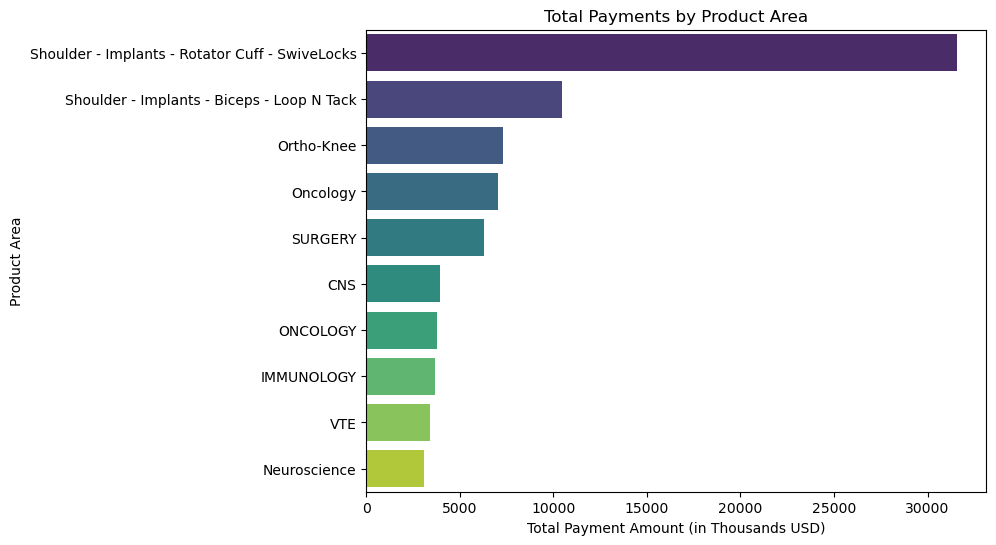

In [ ]:
#Question: Top product areas by total payment amount
#Question: Top products (brand names) by total payment amount

area_payment_summary = combined_df.groupby('ProductCategory')\
    .agg(total=('Total_Amount_of_Payment_USDollars', 'sum'),
         count=('Total_Amount_of_Payment_USDollars', 'count'))\
    .reset_index()\
    .sort_values(by='total', ascending=False)\
    .reset_index(drop=True)

# Get the top 10 product areas by total payment
top_areas = area_payment_summary.head(10)

# Bar plot for payments by product area
plt.figure(figsize=(8, 6))
sns.barplot(data=top_areas, 
            x=top_areas['total'] / 100,  # Convert to thousands USD for readability
            y='ProductCategory', 
            palette='viridis')
plt.title('Total Payments by Product Area')
plt.xlabel('Total Payment Amount (in Thousands USD)')
plt.ylabel('Product Area')
plt.show()


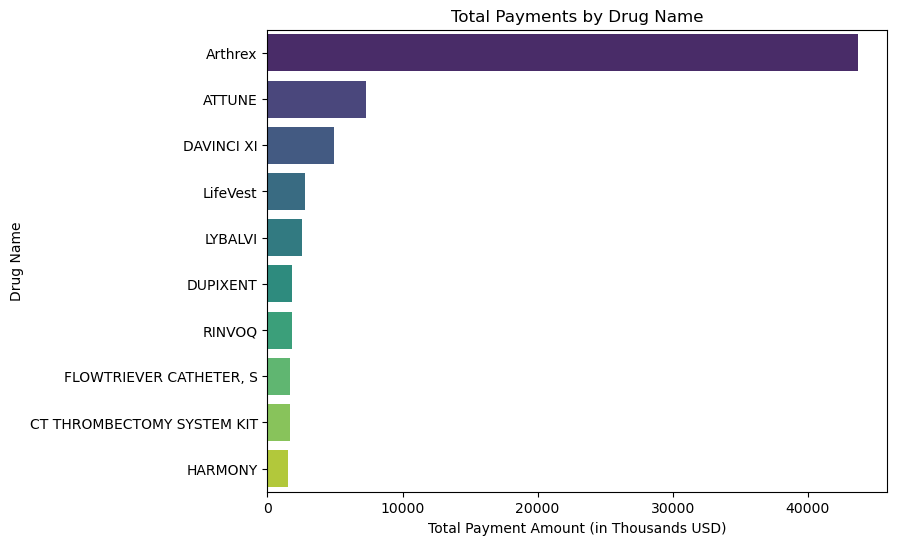

In [ ]:
#Question: Top products (brand names) by total payment amount

drug_payment_summary = combined_df.groupby('ProductName')\
    .agg(total=('Total_Amount_of_Payment_USDollars', 'sum'),
         count=('Total_Amount_of_Payment_USDollars', 'count'))\
    .reset_index()\
    .sort_values(by='total', ascending=False)\
    .reset_index(drop=True)

# Get the top 10 drugs by total payment
top_drugs = drug_payment_summary.head(10)

# Bar plot for payments by drug name
plt.figure(figsize=(8, 6))
sns.barplot(data=top_drugs, 
            x=top_drugs['total'] / 100,  # Convert to thousands USD for readability
            y='ProductName', 
            palette='viridis')
plt.title('Total Payments by Drug Name')
plt.xlabel('Total Payment Amount (in Thousands USD)')
plt.ylabel('Drug Name')
plt.show()


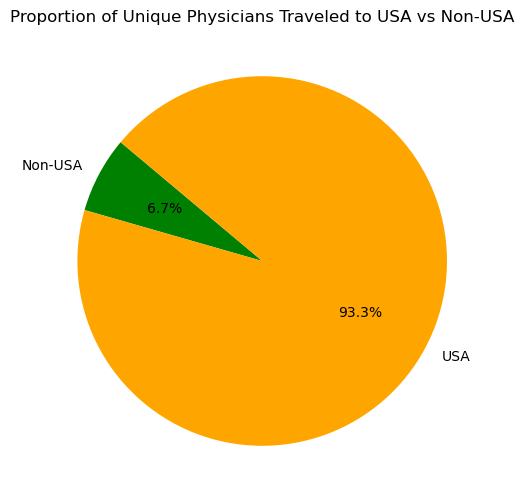

In [ ]:
#THIS IS FOR ANALYSIS. SINCE ONLY FEW TRAVELS OUTSIDE USA=> the decision to make different visualisation to USA and other countires. 

country_data = combined_df.groupby("Country_of_Travel")["Covered_Recipient_Profile_ID"].nunique().reset_index()

country_data["Is_USA"] = country_data["Country_of_Travel"].apply(lambda x: 1 if x == "United States" else 0)

# Aggregate data for pie chart
pie_data = country_data.groupby("Is_USA")["Covered_Recipient_Profile_ID"].sum().reset_index()
pie_data["Category"] = pie_data["Is_USA"].apply(lambda x: "USA" if x == 1 else "Non-USA")

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    pie_data["Covered_Recipient_Profile_ID"],
    labels=pie_data["Category"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["green", "orange"]
)
plt.title("Proportion of Unique Physicians Traveled to USA vs Non-USA")
plt.show()

In [ ]:
country_data2 = combined_df.groupby("Country_of_Travel")["Covered_Recipient_Profile_ID"].nunique().reset_index()
country_data_wu = country_data2[country_data2["Country_of_Travel"] != "United States"]

# Display the first few rows of the filtered DataFrame
country_data_wu.head()

Country_of_Travel  Covered_Recipient_Profile_ID
0            Canada                             5
1          Colombia                             1
2           Denmark                             3
3            France                             3
4           Germany                             5

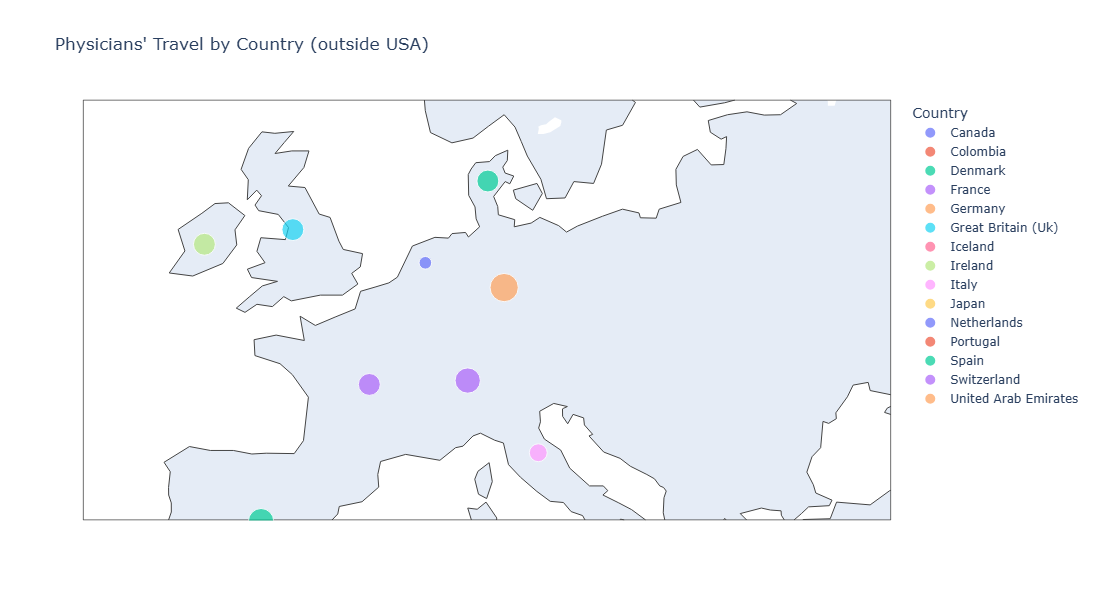

<Figure size 2000x1200 with 0 Axes>

In [ ]:
import plotly.express as px
country_data_wu.columns = ["Country", "Unique_Physicians"]

# Plot using Plotly
fig = px.scatter_geo(
    country_data_wu,
    locations="Country",  # Country names
    locationmode="country names",  # Match country names to map
    size="Unique_Physicians",  # Dot size based on unique physicians
    title="Physicians' Travel by Country (outside USA)",
    projection="natural earth",  # Map projection
    color = "Country",
    width = 1000,
    height = 600
)

plt.figure(figsize=(20, 12))

# Display map
fig.show()

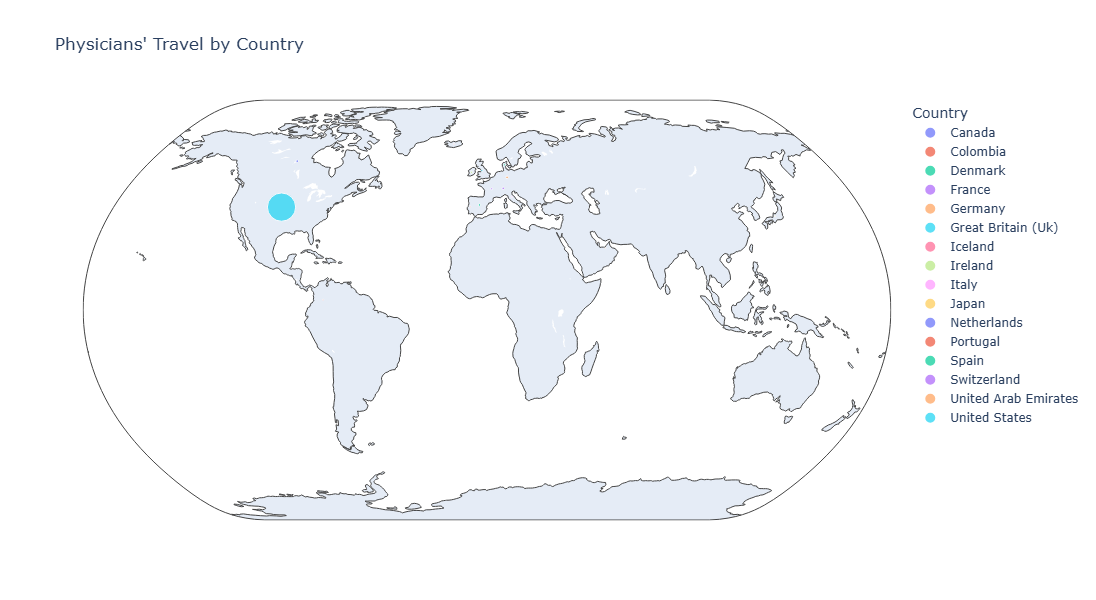

<Figure size 2000x1200 with 0 Axes>

In [ ]:
import plotly.express as px
country_data = combined_df.groupby("Country_of_Travel")["Covered_Recipient_Profile_ID"].nunique().reset_index()
country_data.columns = ["Country", "Unique_Physicians"]

# Plot using Plotly
fig = px.scatter_geo(
    country_data,
    locations="Country",  # Country names
    locationmode="country names",  # Match country names to map
    size="Unique_Physicians",  # Dot size based on unique physicians
    title="Physicians' Travel by Country",
    projection="natural earth",  # Map projection
    color = "Country",
    width = 1000,
    height = 600
)

plt.figure(figsize=(20, 12))

# Display map
fig.show()

In [ ]:
us_data = combined_df[combined_df["Country_of_Travel"] == "United States"]

state_data = us_data.groupby("State_of_Travel")["Covered_Recipient_Profile_ID"].nunique().reset_index()
state_data.head()

State_of_Travel  Covered_Recipient_Profile_ID
0              AL                             2
1              AZ                            32
2              CA                            95
3              CO                            30
4              CT                            10

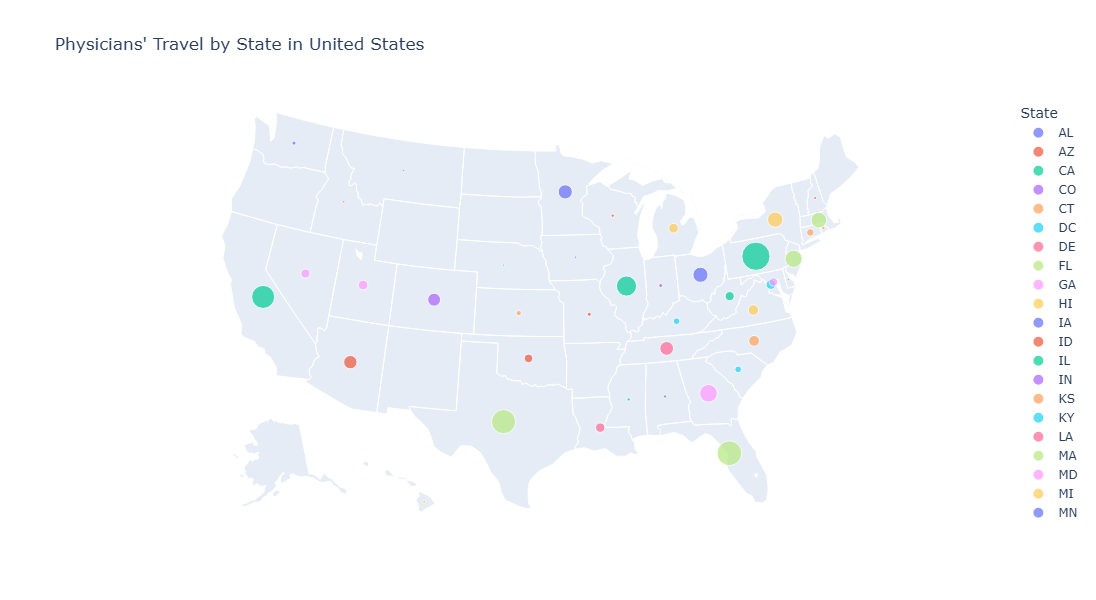

<Figure size 2000x1200 with 0 Axes>

In [ ]:
import plotly.express as px
state_data.columns = ["State", "Unique_Physicians"]

# Plot using Plotly
fig = px.scatter_geo(
    state_data,
    locations="State",  # Country names
    locationmode="USA-states",  # Match country names to map
    size="Unique_Physicians",  # Dot size based on unique physicians
    title="Physicians' Travel by State in United States",
    projection="albers usa",  # Map projection
    color = "State",
    width = 1000,
    height = 600
)

plt.figure(figsize=(20, 12))

# Display map
fig.show()

In [ ]:
 df\
    .groupby(['Nature_of_Payment_or_Transfer_of_Value'])\
    .agg(total_amount=('Total_Amount_of_Payment_USDollars', 'sum'),
         payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
    .reset_index()\
    .sort_values(by=['total_amount'], ascending=False)

Nature_of_Payment_or_Transfer_of_Value  total_amount  \
2   Compensation for services other than consultin...    6548560.39   
4                                      Consulting Fee    3529589.92   
13                                 Royalty or License    2820391.85   
8                                   Food and Beverage    1570720.22   
15                                 Travel and Lodging    1425535.72   
12            Long term medical supply or device loan     578287.02   
10                                              Grant     550953.40   
11                                          Honoraria     467873.21   
3   Compensation for serving as faculty or as a sp...     250448.96   
6                                           Education     219870.40   
0                                        Acquisitions     194046.76   
14  Space rental or facility fees (teaching hospit...      77912.00   
9                                                Gift      53511.05   
5                                    Debt forgiveness      15750.22   
1                             Charitable Contribution       3000.00   
7                                       Entertainment       1803.53   

    payment_count  
2            1828  
4            1258  
13             80  
8           42669  
15           4404  
12             71  
10             74  
11            228  
3              76  
6             623  
0               1  
14             34  
9              63  
5               8  
1               1  
7               9

In [ ]:
 df[df['Total_Amount_of_Payment_USDollars'] < percentile_99]\
    .groupby(['Nature_of_Payment_or_Transfer_of_Value'])\
    .agg(total_amount=('Total_Amount_of_Payment_USDollars', 'sum'),
         payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
    .reset_index()\
    .sort_values(by=['total_amount'], ascending=False)

Nature_of_Payment_or_Transfer_of_Value  total_amount  \
6                                   Food and Beverage    1447284.39   
12                                 Travel and Lodging     134010.52   
4                                           Education      22556.19   
2                                      Consulting Fee       4983.48   
0   Compensation for services other than consultin...       2915.12   
7                                                Gift       2188.18   
10            Long term medical supply or device loan       1278.88   
1   Compensation for serving as faculty or as a sp...        669.71   
5                                       Entertainment        590.69   
11                                 Royalty or License        530.80   
3                                    Debt forgiveness        348.57   
9                                           Honoraria        310.96   
8                                               Grant         52.58   

    payment_count  
6           42242  
12           2115  
4             509  
2              79  
0              37  
7              48  
10             14  
1               8  
5               7  
11             12  
3               5  
9              19  
8               1

In [ ]:
food_df = df[df['Nature_of_Payment_or_Transfer_of_Value']=='Food and Beverage'].reset_index(drop=True)
food_df.Total_Amount_of_Payment_USDollars.describe()

In [ ]:
# percentile_99 = food_df['Total_Amount_of_Payment_USDollars'].quantile(0.99)
# filtered_df = food_df[food_df['Total_Amount_of_Payment_USDollars'] > percentile_99]
# filtered_df.sort_values(by=['Total_Amount_of_Payment_USDollars'],ascending=False)
# remaining_df = food_df[food_df['Total_Amount_of_Payment_USDollars']<percentile_99].reset_index(drop=True)

In [ ]:
# import json
# import csv

# # Load JSON data from the text file
# with open('data_dict.json', 'r', encoding='utf-8') as file:
#     json_data = json.load(file)

# # Extract fields
# fields = json_data['data']['fields']

# # Define CSV file name
# csv_file_name = 'output.csv'

# # Write JSON data to CSV format
# with open(csv_file_name, 'w', newline='', encoding='utf-8') as csv_file:
#     csv_writer = csv.writer(csv_file)
    
#     # Write header
#     header = ['Title', 'Description', 'Type']
#     csv_writer.writerow(header)
    
#     # Write rows
#     for field in fields:
#         csv_writer.writerow([field['title'], field['description'], field['type']])

# print(f"Data has been written to {csv_file_name}")

In [ ]:
df2 = df[df['Nature_of_Payment_or_Transfer_of_Value'].isin(['Food and Beverage','Travel and Lodging'])]
percentile_99 = df2['Total_Amount_of_Payment_USDollars'].quantile(0.999)
df3 = df2[df2['Total_Amount_of_Payment_USDollars'] < percentile_99].reset_index(drop=True)

In [ ]:
df3.Total_Amount_of_Payment_USDollars.describe()

count    47025.000000
mean        58.434703
std        121.949483
min          0.010000
25%         14.960000
50%         21.000000
75%         44.940000
max       1921.090000
Name: Total_Amount_of_Payment_USDollars, dtype: float64

## Analysis

### Analysis of payments vs product type


C:\Users\Abhijna S\AppData\Local\Temp\ipykernel_20348\2284994688.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_type_summary,


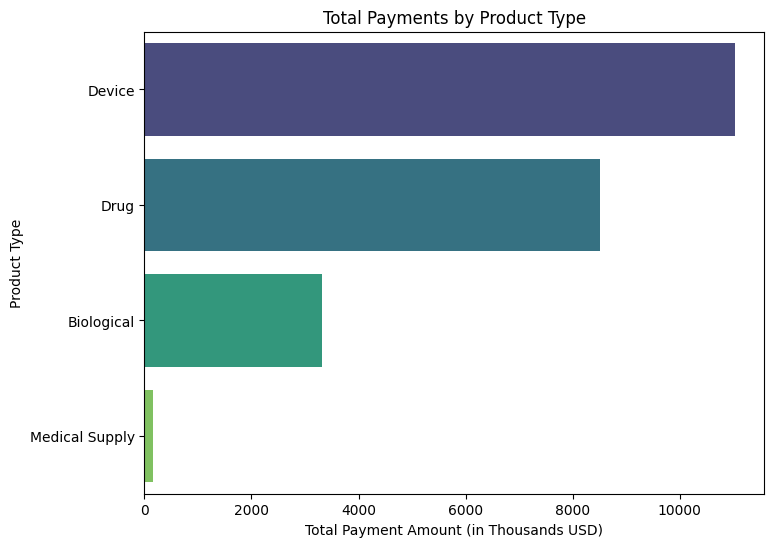

In [ ]:
payment_type_summary = df3.groupby('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1')\
                    .agg(total=('Total_Amount_of_Payment_USDollars', 'sum'),
                         avg=('Total_Amount_of_Payment_USDollars', 'mean'),
                         count=('Total_Amount_of_Payment_USDollars', 'count'))\
                    .reset_index()\
                    .sort_values(by='total', ascending=False)\
                     .reset_index(drop=True)
# print(payment_type_summary.head(10))  

# Bar plot for payment by product type
plt.figure(figsize=(8, 6))
sns.barplot(data=payment_type_summary, 
            x=payment_type_summary['total'] / 100, 
            y='Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 
            palette='viridis')
plt.title('Total Payments by Product Type')
plt.xlabel('Total Payment Amount (in Thousands USD)')
plt.ylabel('Product Type')
plt.show()

### Payments trend overtime (2023)

In [ ]:
df3['Month'] = pd.to_datetime(df3['Date_of_Payment']).dt.month

# Monthly summary aggregation
monthly_summary = df3.groupby('Month')\
                    .agg(total_payments=('Total_Amount_of_Payment_USDollars', 'sum'),
                         avg_payment=('Total_Amount_of_Payment_USDollars', 'mean'),
                         payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
                    .reset_index()

# Scale payments to thousands of USD
monthly_summary['total_payments'] = monthly_summary['total_payments'] / 1000

# Map month numbers to month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                 'August', 'September', 'October', 'November', 'December']
monthly_summary['Month'] = monthly_summary['Month'].apply(lambda x: month_names[x - 1])

# Monthly category summary
monthly_category_summary = df3.groupby(['Month', 'Nature_of_Payment_or_Transfer_of_Value'])\
                                  .agg(total_payment=('Total_Amount_of_Payment_USDollars', 'sum'))\
                                  .reset_index()

pivot_df = monthly_category_summary.pivot(index='Month', 
                                          columns='Nature_of_Payment_or_Transfer_of_Value', 
                                          values='total_payment')
pivot_df = pivot_df / 1000

# Map month numbers to month names for pivot DataFrame
pivot_df.index = [month_names[i - 1] for i in pivot_df.index]


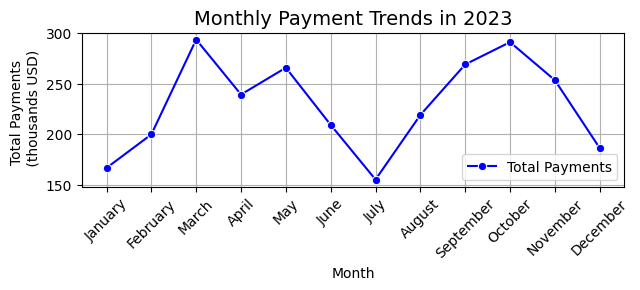

In [ ]:
# Time series plot for payments in 2023

plt.figure(figsize=(7, 2))
sns.lineplot(data=monthly_summary, x='Month', y='total_payments', marker='o', label='Total Payments', color='blue')

plt.title('Monthly Payment Trends in 2023', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Payments \n (thousands USD)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


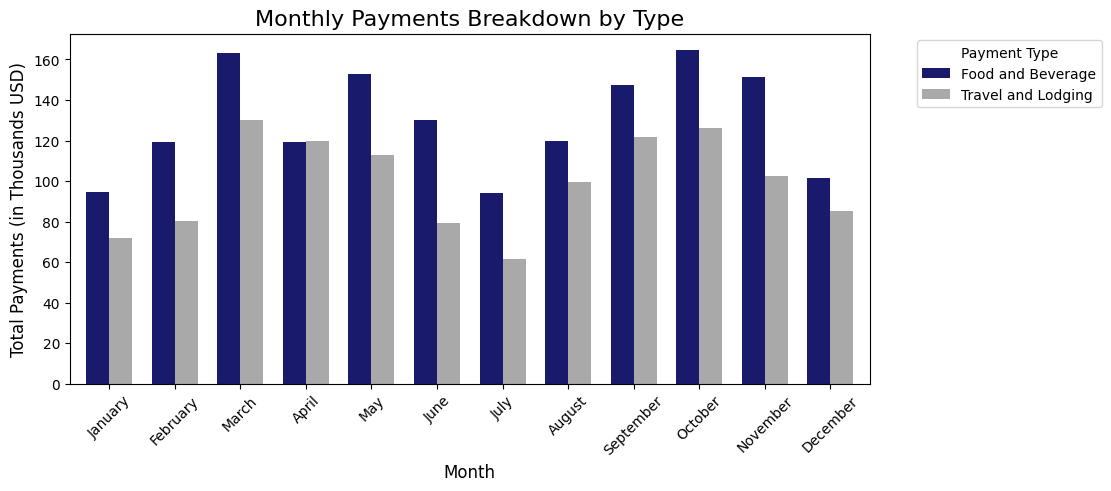

In [ ]:
import matplotlib.pyplot as plt

colors = ['#1a1a6d', '#a9a9a9'] 

fig, ax = plt.subplots(figsize=(10, 5))

# grouped bar chart
pivot_df.plot(
    kind='bar',
    stacked=False,
    color=colors,
    ax=ax,
    width=0.7
)

ax.set_title('Monthly Payments Breakdown by Type', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Payments (in Thousands USD)', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(bottom=0.2, left=0.1, right=0.9, top=0.9)

plt.show()


## Medical Specialties vs payments:

C:\Users\Abhijna S\AppData\Local\Temp\ipykernel_20348\3986549714.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_payment', y='Specialty_Label', data=top_specialties, palette="viridis")


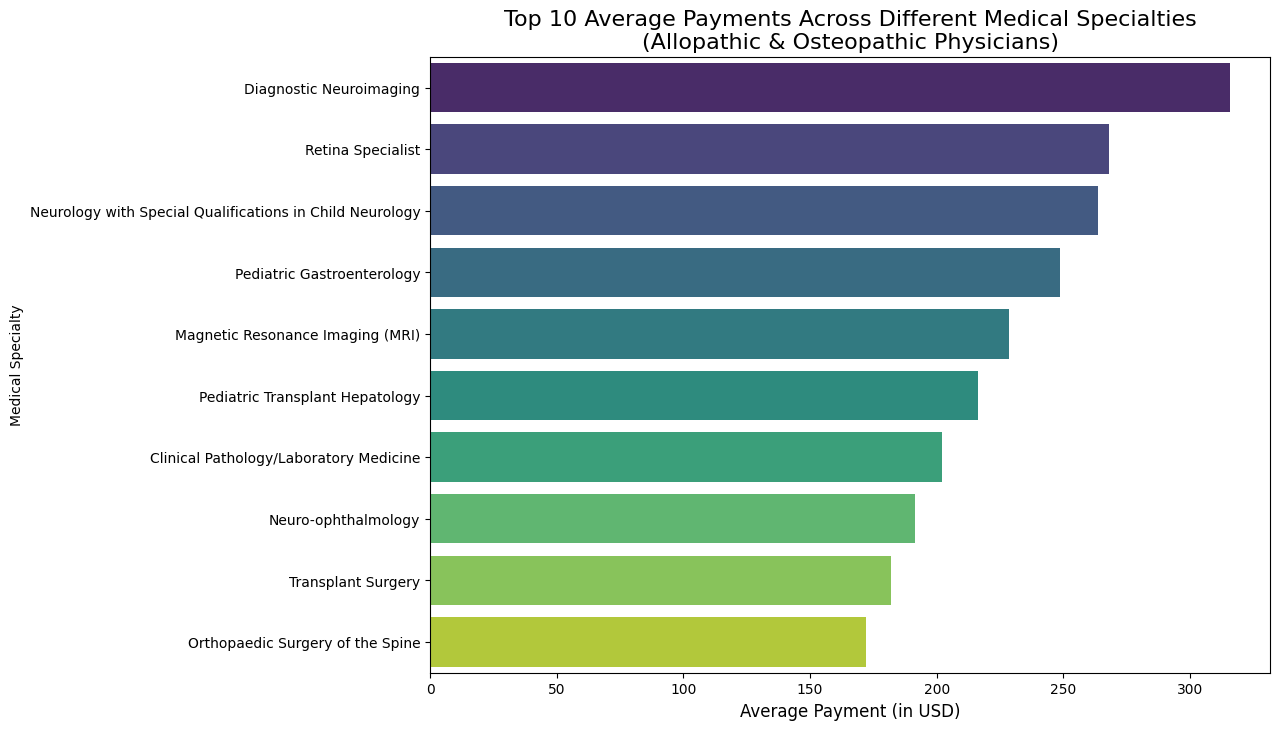

In [ ]:
specialty_avg_payments = df3.groupby('Covered_Recipient_Specialty_1')\
                            .agg(avg_payment=('Total_Amount_of_Payment_USDollars', 'mean'))\
                            .reset_index()

specialty_avg_payments['avg_payment'] = specialty_avg_payments['avg_payment']

specialty_avg_payments['Specialty_Label'] = specialty_avg_payments['Covered_Recipient_Specialty_1'].apply(lambda x: x.split('|')[-1])

common_values = specialty_avg_payments['Covered_Recipient_Specialty_1'].apply(lambda x: x.split('|')[0]).unique()[0]

specialty_avg_payments = specialty_avg_payments.sort_values(by='avg_payment', ascending=False)

top_specialties = specialty_avg_payments.head(10)

# Bar graph



plt.figure(figsize=(12, 8))

sns.barplot(x='avg_payment', y='Specialty_Label', data=top_specialties, palette="viridis")

handles = [plt.Line2D([0], [0], color=color, lw=4) for color in sns.color_palette("viridis", len(top_specialties))]
labels = top_specialties['Specialty_Label']

plt.title(f'Top 10 Average Payments Across Different Medical Specialties\n({common_values})', fontsize=16)
plt.xlabel('Average Payment (in USD)', fontsize=12)
plt.ylabel('Medical Specialty')

# plt.legend(handles, labels, title='Specialties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(left=0.2)

plt.show()



### Covered_Recipient_Type VS the number of payments

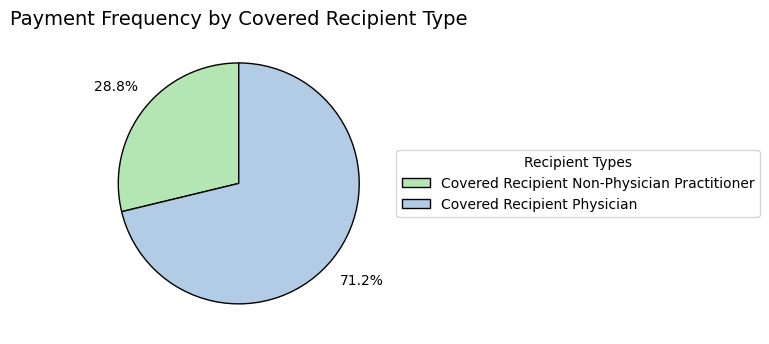

In [ ]:
payment_frequency = df.groupby('Covered_Recipient_Type')\
                      .agg(payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
                      .reset_index()


colors = ['#b3e6b3', '#b3cce6']  

# Pie Chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(payment_frequency['payment_count'], 
                                   labels=None,  
                                   autopct='%1.1f%%', 
                                   colors=colors, 
                                   startangle=90, 
                                   wedgeprops={'edgecolor': 'black'},
                                   pctdistance=1.3)  


plt.title('Payment Frequency by Covered Recipient Type', fontsize=14)

plt.legend(wedges, payment_frequency['Covered_Recipient_Type'], 
           title="Recipient Types", 
           bbox_to_anchor=(1, 0.5), 
           loc="center left", 
           fontsize=10)

for autotext in autotexts:
    autotext.set_color('black')  
    autotext.set_fontsize(10)    

plt.tight_layout()
plt.show()


## Distribution of Payments between General and Research

In [ ]:
research_df = pd.read_csv('research_data.csv')

C:\Users\Abhijna S\AppData\Local\Temp\ipykernel_20348\923469730.py:1: DtypeWarning: Columns (5,8,9,10,11,20,26,32,43,73,97,101,104,106,108,110,111,112,113,116,122,128,129,227,228,229,230,231) have mixed types. Specify dtype option on import or set low_memory=False.
  research_df = pd.read_csv('research_data.csv')


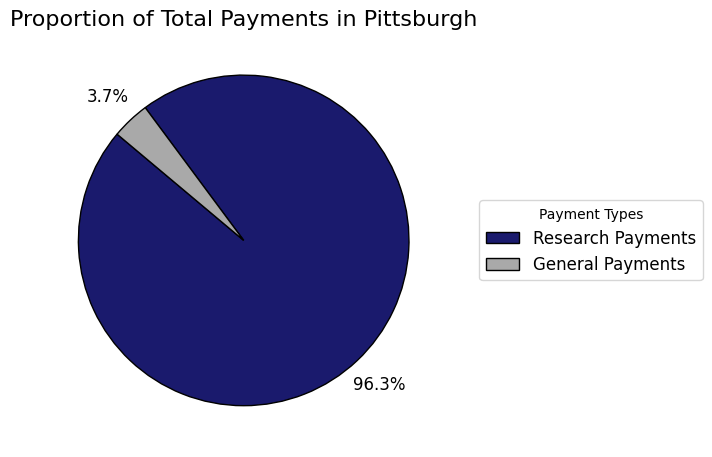

In [ ]:
total_research_amount = research_df['Total_Amount_of_Payment_USDollars'].sum()
total_general_amount = df3['Total_Amount_of_Payment_USDollars'].sum()

data_totals = {'Research Payments': total_research_amount, 'General Payments': total_general_amount}
colors = ['#1a1a6d', '#a9a9a9']  # Shades of gray and blue

# Pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(data_totals.values(), 
                                   labels=None, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=colors,
                                   wedgeprops={'edgecolor': 'black'},
                                   pctdistance=1.2)

plt.title('Proportion of Total Payments in Pittsburgh', fontsize=16)

plt.legend(wedges, data_totals.keys(), 
           title="Payment Types", 
           bbox_to_anchor=(1.05, 0.5), 
           loc="center left",
           fontsize=12)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()


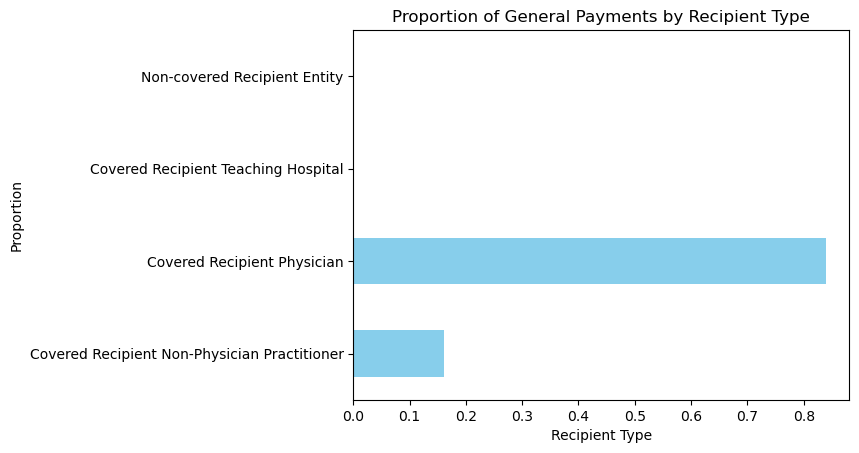

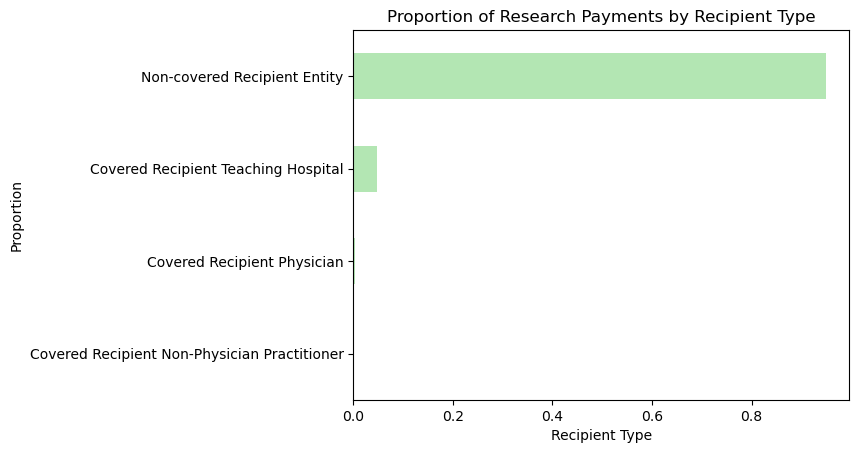

In [ ]:
# Porportion of Payments by Recepient Type
general_summary = df3.groupby('Covered_Recipient_Type')['Total_Amount_of_Payment_USDollars'].sum()
research_summary = research.groupby('Covered_Recipient_Type')['Total_Amount_of_Payment_USDollars'].sum()

general_proportions = general_summary / general_summary.sum()
research_proportions = research_summary / research_summary.sum()

comparison_df = pd.DataFrame({
    'General Payments': general_proportions,
    'Research Payments': research_proportions
}).reset_index()

# General Payments 
comparison_df.plot(
    x='Covered_Recipient_Type',
    y='General Payments',
    kind='barh',
    color='skyblue',
    legend=False
)
plt.title('Proportion of General Payments by Recipient Type')
plt.ylabel('Proportion')
plt.xlabel('Recipient Type')
plt.savefig("plot1.png", dpi=300, bbox_inches="tight")

# Research Payments
comparison_df.plot(
    x='Covered_Recipient_Type',
    y='Research Payments',
    kind='barh',
    color = '#b3e6b3',
    legend=False
)
plt.title('Proportion of Research Payments by Recipient Type')
plt.ylabel('Proportion')
plt.xlabel('Recipient Type')
plt.savefig("plot2.png", dpi=300, bbox_inches="tight")


Text(0.5, 1.0, 'ClinicalTrials.gov Registration Status')

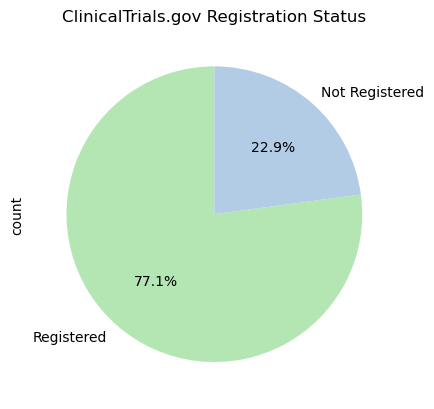

In [ ]:
# Registration of Studies on ClinicalTrials.gov 
registration_status = research['ClinicalTrials_Gov_Identifier'].notna().value_counts()
registration_labels = ['Registered', 'Not Registered']

registration_status.plot(kind='pie', labels=registration_labels, autopct='%1.1f%%', startangle=90, colors = ['#b3e6b3', '#b3cce6'])
plt.title('ClinicalTrials.gov Registration Status')



Text(0.5, 1.0, 'Dispute Status of Research Studies')

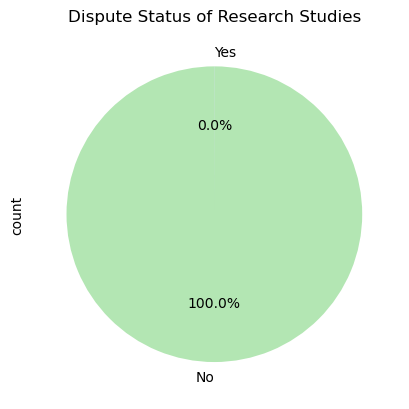

In [ ]:
# Dispute Status of Studies 
dispute_status = research['Dispute_Status_for_Publication'].value_counts()
dispute_labels = dispute_status.index

dispute_status.plot(kind='pie', labels=dispute_labels, autopct='%1.1f%%', startangle=90, colors = ['#b3e6b3', '#b3cce6'])
plt.title('Dispute Status of Research Studies')

             Teaching_Hospital_Name  Total_Amount_of_Payment_USDollars
0        ALLEGHENY GENERAL HOSPITAL                            1555.60
3                  UPMC St Margaret                            4000.00
8     Western Pennsylvania Hospital                           25384.99
6        Upmc Magee-Womens Hospital                           34695.00
7               Upmc Mercy Hospital                          118665.86
4  Univ Of Mi Hospitals & Hlth Ctrs                          482482.74
5    Upmc Childrens Hospital Of Pgh                          597093.39
2    UPMC CHILDRENS HOSPITAL OF PGH                          641750.58
1     UPMC - PRESBYTERIAN SHADYSIDE                         1530709.52


Text(0.5, 1.0, 'Payments to Teaching Hospitals')

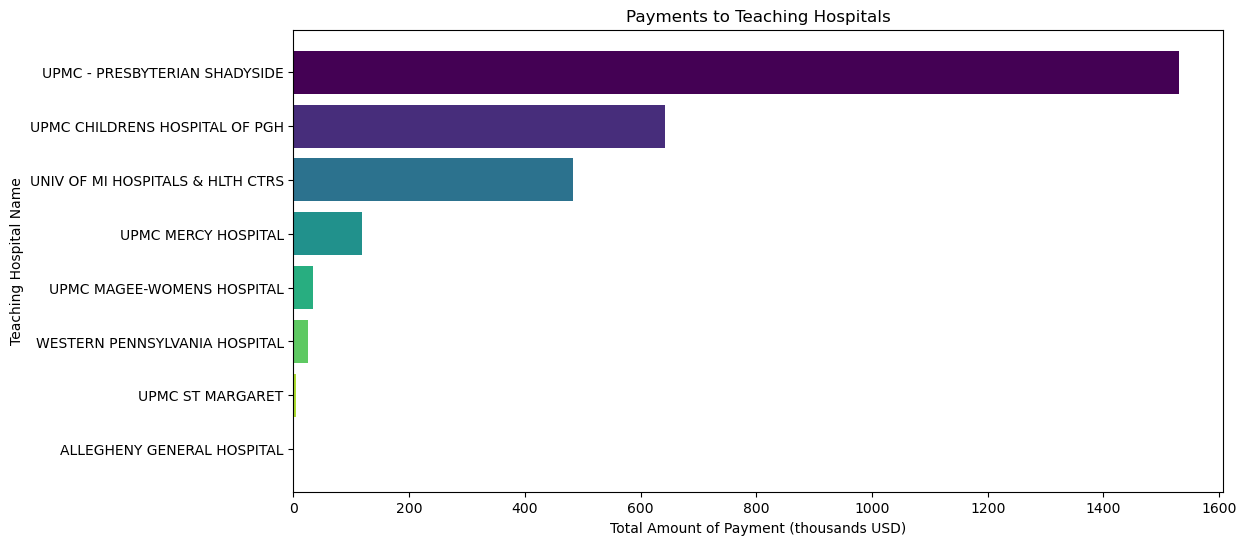

In [ ]:
# Teaching Hospitals - Research Payments 
# Correcting Duplicate Names 
bad2good = {'Upmc - Presbyterian Shadyside': 'UPMC - PRESBYTERIAN SHADYSIDE',
           ' UPMC CHILDRENS HOSPITAL OF PGH': 'UPMC CHILDRENS HOSPITAL OF PGH'}
research['Teaching_Hospital_Name'] = research['Teaching_Hospital_Name'].replace(bad2good)

# Payments Given to Specific Teaching Hospitals 
Teaching_hospitals = research.groupby('Teaching_Hospital_Name')['Total_Amount_of_Payment_USDollars'].sum()
teaching_hospitals_df = Teaching_hospitals.reset_index()
teaching_hospitals_df.columns = ['Teaching_Hospital_Name', 'Total_Amount_of_Payment_USDollars']
teaching_hospitals_df = teaching_hospitals_df.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=True)
print(teaching_hospitals_df)

# Consistency in Case and plot
teaching_hospitals_df['Teaching_Hospital_Name'] = teaching_hospitals_df['Teaching_Hospital_Name'].replace(
    {'UPMC St Margaret': 'UPMC ST MARGARET',
    'Upmc Magee-Womens Hospital':'UPMC MAGEE-WOMENS HOSPITAL',
    'Univ Of Mi Hospitals & Hlth Ctrs':'UNIV OF MI HOSPITALS & HLTH CTRS',
    'Upmc Mercy Hospital':'UPMC MERCY HOSPITAL',
    'Western Pennsylvania Hospital':'WESTERN PENNSYLVANIA HOSPITAL',
    'Upmc Childrens Hospital Of Pgh':'UPMC CHILDRENS HOSPITAL OF PGH'})

plt.figure(figsize=(12, 6))
bars = plt.barh(teaching_hospitals_df['Teaching_Hospital_Name'], 
               teaching_hospitals_df['Total_Amount_of_Payment_USDollars']/1000,
              color = plt.cm.viridis(np.linspace(1, 0, len(teaching_hospital_df))))

plt.ylabel("Teaching Hospital Name")
plt.xlabel("Total Amount of Payment (thousands USD)")
plt.title("Payments to Teaching Hospitals")

(222, 2)
                       Noncovered_Recipient_Entity_Name  \
66                                 NSABP FOUNDATION INC   
114                            UNIVERSITY OF PITTSBURGH   
136                 UNIVERSITY OF PITTSBURGH PHYSICIANS   
119           UNIVERSITY OF PITTSBURGH CANCER INSTITUTE   
189  University Of Pittsburgh-Of The Commonwealth Syste   
120  UNIVERSITY OF PITTSBURGH CANCER INSTITUTE CANCER S   
146                                                UPMC   
164                   UPMC INVESTIGATIONAL DRUG SERVICE   
147                              UPMC CANCER CENTER IDS   
161                            UPMC HILLMAN CC INV DRUG   

     Total_Amount_of_Payment_USDollars  
66                         16713367.68  
114                         7403409.14  
136                         4974279.51  
119                         4628474.48  
189                         2964315.45  
120                         2789465.20  
146                         1761411.82  
164          

Text(0.5, 1.0, 'Payments to Non Covered Entities')

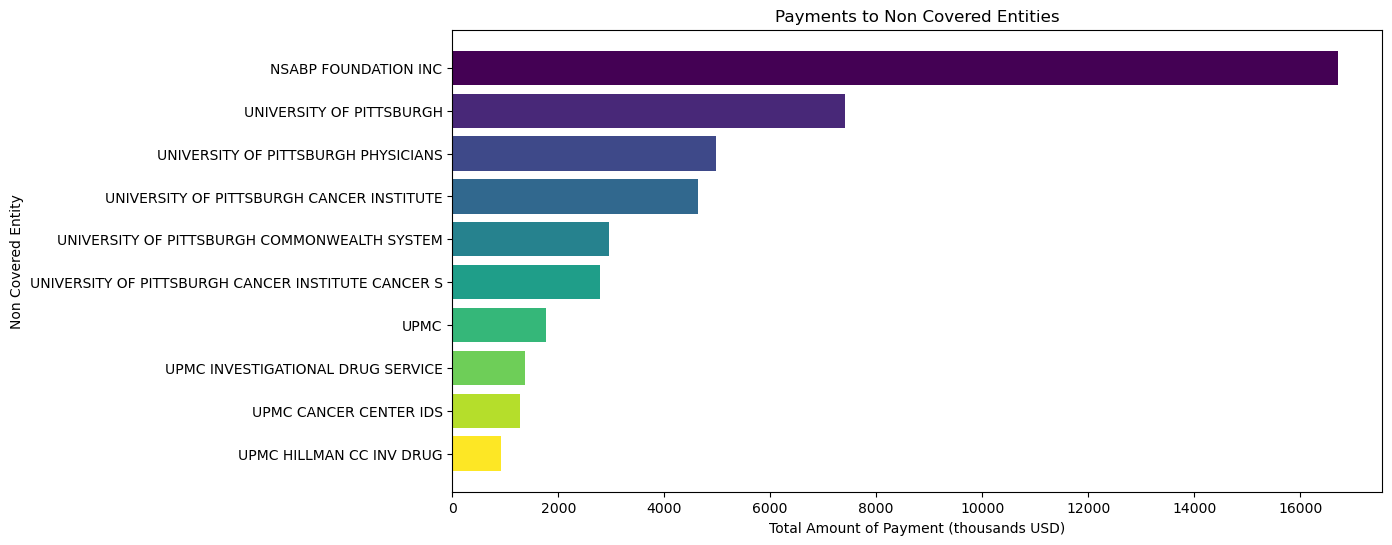

In [ ]:
# Non Covered Entities Research Payments 
# Correcting for name inconsistencies 
research['Noncovered_Recipient_Entity_Name'] = research['Noncovered_Recipient_Entity_Name'].replace(
    {'University of Pittsburgh': 'UNIVERSITY OF PITTSBURGH', 
    'University Of Pittsburgh Physicians':'UNIVERSITY OF PITTSBURGH PHYSICIANS',
    'University of Pittsburgh Cancer Institute':'UNIVERSITY OF PITTSBURGH CANCER INSTITUTE',
    'UNIV OF PITTSBURGH': 'UNIVERSITY OF PITTSBURGH', 
    'University of Pittsburgh Cancer Institute Cancer S':'UNIVERSITY OF PITTSBURGH CANCER INSTITUTE CANCER S'})
Non_Covered_Recepient_Entity = research.groupby('Noncovered_Recipient_Entity_Name')['Total_Amount_of_Payment_USDollars'].sum()
Non_Covered_Recepient_Entity_df = Non_Covered_Recepient_Entity.reset_index()
print(Non_Covered_Recepient_Entity_df.shape)
Non_Covered_Recepient_Entity_df.columns = ['Noncovered_Recipient_Entity_Name', 'Total_Amount_of_Payment_USDollars']
Non_Covered_Recepient_Entity_df = Non_Covered_Recepient_Entity_df.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)
print(Non_Covered_Recepient_Entity_df.head(10))

# Correcting for cases and plot
Non_Covered_Recepient_Entity_df = Non_Covered_Recepient_Entity_df.head(10).sort_values(by = 'Total_Amount_of_Payment_USDollars', ascending = True)
Non_Covered_Recepient_Entity_df['Noncovered_Recipient_Entity_Name'] = Non_Covered_Recepient_Entity_df['Noncovered_Recipient_Entity_Name'].replace(
    {'University Of Pittsburgh-Of The Commonwealth Syste':'UNIVERSITY OF PITTSBURGH COMMONWEALTH SYSTEM'})
plt.figure(figsize=(12, 6))
bars = plt.barh(Non_Covered_Recepient_Entity_df['Noncovered_Recipient_Entity_Name'], 
               Non_Covered_Recepient_Entity_df['Total_Amount_of_Payment_USDollars']/1000,
              color = plt.cm.viridis(np.linspace(1, 0, len(Non_Covered_Recepient_Entity_df))))

plt.ylabel("Non Covered Entity")
plt.xlabel("Total Amount of Payment (thousands USD)")
plt.title("Payments to Non Covered Entities")


(71, 2)
                                                                                      Speciality_Name  \
63                                                        Allopathic & Osteopathic Physicians|Surgery   
36                                                 Allopathic & Osteopathic Physicians|Otolaryngology   
25                                 Allopathic & Osteopathic Physicians|Internal Medicine|Rheumatology   
20                           Allopathic & Osteopathic Physicians|Internal Medicine|Infectious Disease   
50                               Allopathic & Osteopathic Physicians|Pediatrics|Pediatric Pulmonology   
7                                              Allopathic & Osteopathic Physicians|Emergency Medicine   
28                   Allopathic & Osteopathic Physicians|Medical Genetics|Clinical Molecular Genetics   
38                     Allopathic & Osteopathic Physicians|Pain Medicine|Interventional Pain Medicine   
55  Allopathic & Osteopathic Physicians|Psychia

Text(0.5, 1.0, 'Top 10 Average Payments Across Different Medical Specialities (Allopathic & Osteopathic Physicians)')

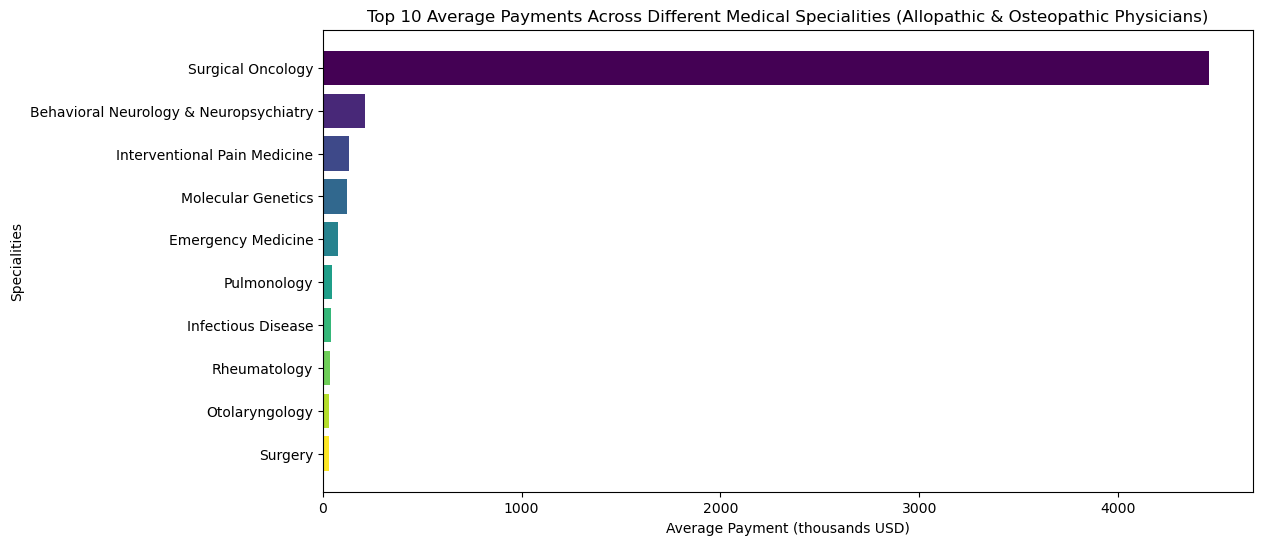

In [ ]:
# 10 Specialities recieving the highest research payments 
Speciality = research.groupby('Principal_Investigator_1_Specialty_1')['Total_Amount_of_Payment_USDollars'].mean()
Speciality_df = Speciality.reset_index()
print(Speciality_df.shape)
Speciality_df.columns = ['Speciality_Name', 'Total_Amount_of_Payment_USDollars']
Speciality_df = Speciality_df.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)
Speciality_df = Speciality_df.head(10).sort_values(by = 'Total_Amount_of_Payment_USDollars', ascending = True)
print(Speciality_df)

# Providing shorter names for visuals to look clean
Speciality_df['Speciality_Name'] = Speciality_df['Speciality_Name'].replace(
    {'Allopathic & Osteopathic Physicians|Surgery|Surgical Oncology':'Surgical Oncology',
    'Allopathic & Osteopathic Physicians|Internal Medicine|Hematology & Oncology':'Hematology & Oncology',
    'Allopathic & Osteopathic Physicians|Internal Medicine':'Internal Medicine',
    'Allopathic & Osteopathic Physicians|Internal Medicine|Rheumatology':'Rheumatology',
    'Allopathic & Osteopathic Physicians|Internal Medicine|Medical Oncology':'Medical Oncology',
    'Allopathic & Osteopathic Physicians|General Practice':'General Practice',
    'Allopathic & Osteopathic Physicians|Pediatrics':'Pediatrics',
    'Allopathic & Osteopathic Physicians|Obstetrics & Gynecology':'Obstetrics & Gynecology',
    'Allopathic & Osteopathic Physicians|Surgery':'Surgery',
    'Allopathic & Osteopathic Physicians|Psychiatry & Neurology|Neurology':'Neurology',
    'Allopathic & Osteopathic Physicians|Otolaryngology': 'Otolaryngology',
    'Allopathic & Osteopathic Physicians|Internal Medicine|Infectious Disease':'Infectious Disease',
    'Allopathic & Osteopathic Physicians|Pediatrics|Pediatric Pulmonology':'Pulmonology',
    'Allopathic & Osteopathic Physicians|Emergency Medicine':'Emergency Medicine',
    'Allopathic & Osteopathic Physicians|Medical Genetics|Clinical Molecular Genetics':'Molecular Genetics',
    'Allopathic & Osteopathic Physicians|Pain Medicine|Interventional Pain Medicine':'Interventional Pain Medicine',
    'Allopathic & Osteopathic Physicians|Psychiatry & Neurology|Behavioral Neurology & Neuropsychiatry':'Behavioral Neurology & Neuropsychiatry'})
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(Speciality_df))
bars = plt.barh(Speciality_df['Speciality_Name'], 
               Speciality_df['Total_Amount_of_Payment_USDollars']/ 1000, 
               color= plt.cm.viridis(np.linspace(1, 0, len(Non_Covered_Recepient_Entity_df))))
plt.ylabel("Specialities")
plt.xlabel("Average Payment (thousands USD)")
plt.title("Top 10 Average Payments Across Different Medical Specialities (Allopathic & Osteopathic Physicians)")


Text(0, 0.5, ' ')

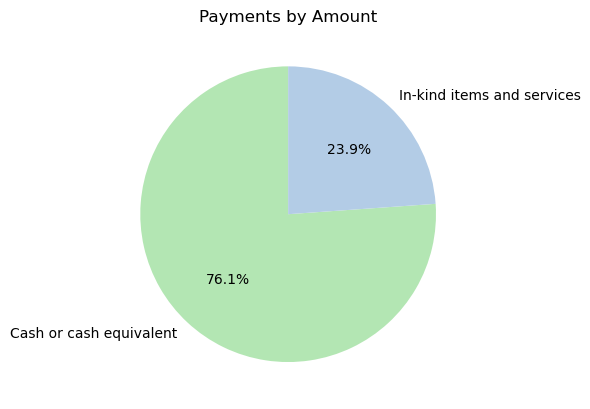

In [ ]:
# Transaction kind based on the amount of payments
Payment_kind = research.groupby('Form_of_Payment_or_Transfer_of_Value')['Total_Amount_of_Payment_USDollars'].sum()
Payment_kind.plot(kind = 'pie', autopct='%1.1f%%', startangle=90, colors = ['#b3e6b3', '#b3cce6'])
plt.title('Payments by Amount')
plt.ylabel(' ')

Text(0, 0.5, ' ')

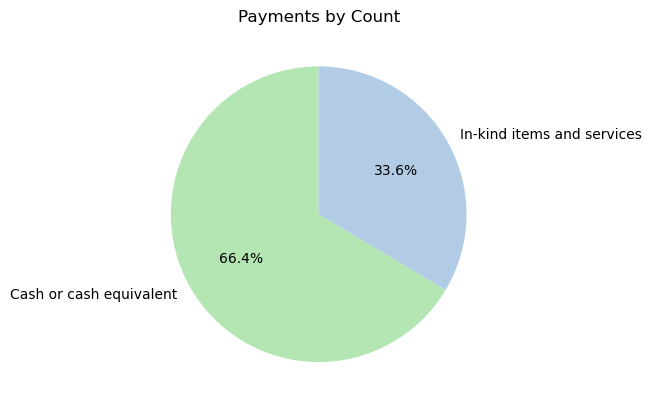

In [ ]:
# Transaction kind based on the number of payments
Payment_count = research['Form_of_Payment_or_Transfer_of_Value'].value_counts()
Payment_count.plot(kind='pie',autopct='%1.1f%%', startangle=90, colors = ['#b3e6b3', '#b3cce6'])
plt.title('Payments by Count')
plt.ylabel(' ')

0        2
1        5
2        6
3        4
4        6
        ..
5802     4
5803     4
5804     1
5805    11
5806    10
Name: Month, Length: 5807, dtype: int32
    Month  total_payments   avg_payment  payment_count
0       1     10615425.28  26874.494380            395
1       2      5221004.27  15133.345710            345
2       3     15990582.98  35377.395973            452
3       4      3146145.40   6651.470190            473
4       5      2760577.09   4409.867556            626
5       6      2846933.16   3806.060374            748
6       7      3567232.31  13512.243598            264
7       8      2333749.38   4831.779255            483
8       9      7446531.70  30270.454065            246
9      10      2691356.35   3743.193811            719
10     11      2759604.26   5497.219641            502
11     12     11506068.34  20769.076426            554


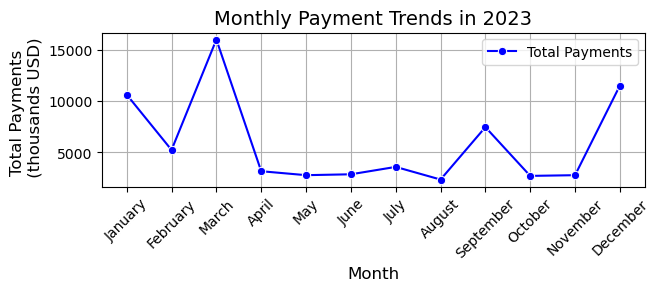

In [ ]:
# Monthly Time Series for Research Payments 
research['Month'] = pd.to_datetime(research['Date_of_Payment']).dt.month
print(research['Month'])
monthly_summary = research.groupby('Month')\
                    .agg(total_payments=('Total_Amount_of_Payment_USDollars', 'sum'),
                         avg_payment=('Total_Amount_of_Payment_USDollars', 'mean'),
                         payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
                    .reset_index()

print(monthly_summary)

monthly_summary['total_payments'] = monthly_summary['total_payments'] / 1000

# Set month names (assuming the 'Month' column is in a numerical format, i.e., 1 for January, 2 for February, etc.)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary['Month'] = monthly_summary['Month'].apply(lambda x: month_names[x - 1])

# Plot the time series
plt.figure(figsize=(7, 2))
sns.lineplot(data=monthly_summary, x='Month', y='total_payments', marker='o', label='Total Payments', color='blue')

# Customize the plot
plt.title('Monthly Payment Trends in 2023', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Payments \n (thousands USD)', fontsize=12)
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.grid(True)
plt.legend()

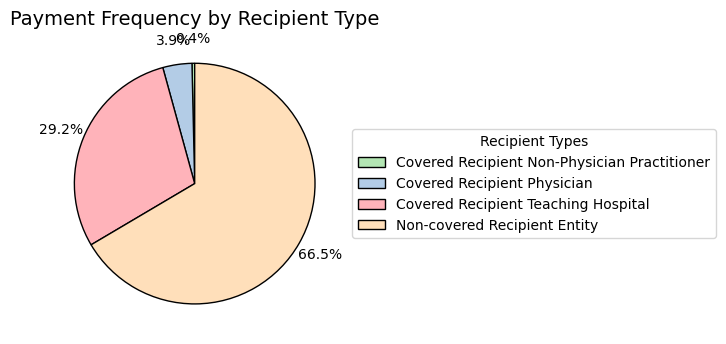

In [ ]:
# Payment Frequency by Recepient Type 
payment_frequency = research.groupby('Covered_Recipient_Type')\
                      .agg(payment_count=('Total_Amount_of_Payment_USDollars', 'count'))\
                      .reset_index()

colors = ['#b3e6b3', '#b3cce6', '#FFB3BA', '#FFDFBA']  # Green and blue shades


plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(payment_frequency['payment_count'], 
                                   labels=None,  # Do not display labels directly on wedges
                                   autopct='%1.1f%%', 
                                   colors=colors, 
                                   startangle=90, 
                                   wedgeprops={'edgecolor': 'black'},
                                   pctdistance=1.2)  # Move percentages further outside the pie


plt.title('Payment Frequency by Recipient Type', fontsize=14)

plt.legend(wedges, payment_frequency['Covered_Recipient_Type'], 
           title="Recipient Types", 
           bbox_to_anchor=(1, 0.5), 
           loc="center left", 
           fontsize=10)

for autotext in autotexts:
    autotext.set_color('black')  # Text color
    autotext.set_fontsize(10)    # Font size

plt.tight_layout()
plt.show()